In [ ]:
# Olist E-Commerce Dataset Project
### Machine Learning 1
###### Team Members
• Helene Barrera 
• Justin Ehly 
• Babatunde “John” Olanipekun 
• Feby Thomas Cheruvathoor


In [1]:
# set up environment
import numpy as np
import pandas as pd
import os
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# get current working directory
os.getcwd()
# change working directory
os.chdir('D:\MS in Data Science\Machine Learning\Project\Data')
os.getcwd()

'D:\\MS in Data Science\\Machine Learning\\Project\\Data'

In [2]:
# set up some colors and text attributes to markdown
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
customers = pd.read_csv('olist_customers_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
translation = pd.read_csv('product_category_name_translation.csv')



In [4]:
the_df = {'customers': customers,
              'items': items, 
              'payments': payments, 
              'orders': orders, 
              'products': products, 
              'sellers': sellers, 
              'reviews': reviews,
              'categories': translation}
print("_______________________________________________________________________________________________")
print("Description of the {} dataframes".format(len(the_df)))
print("_______________________________________________________________________________________________")
for i, j in the_df.items():
    print('{} dataframe:      {} rows and {} columns'.format(str(i),j.shape[0],j.shape[1]))
    print(list(j.columns))
    print("")
print("________________________________________________________________________________________________")

_______________________________________________________________________________________________
Description of the 8 dataframes
_______________________________________________________________________________________________
customers dataframe:      99441 rows and 5 columns
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

items dataframe:      112650 rows and 7 columns
['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']

payments dataframe:      103886 rows and 5 columns
['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']

orders dataframe:      99441 rows and 8 columns
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

products dataframe:      32951 rows and 9 columns
['product_id', 'product_category_n

# Merge the CSV Files
### Begin the process of merging the csv files together
Keeping in mind there are going to duplicate keys for order_id and customer_id because one order may contain 
- 1 item
- 1 payment 
- 1 review (each item may have a separate review)
### List of Pre-Merge Items
1. ~~Need to merge customers + geolocation as customers_geo~~
2. ~~Need to merge sellers + geolocation as sellers_geo~~
3. Need to merge products + translations as pdf
    * imput 2 missing translations as products_eng
    * remove original category
    * rename english category to shorten name to *product_category_english*

##### BIG NOTE TO JOHN
-I know how bad you want to play with the geolocation data, but due to the number of duplicate zip code prefixes of 19,015 this increases the customerso df to 15,083,733 records and it takes up over 1.2G memory before we even start to merge with other df's
-I expect the same thing might happen with with the sellers df.

### Merge order
1. inner merge customers + orders as df 
2. right merge df + reviews as df2
3. right merge df2 + payments as df3
4. right merge df3 + items as df4
5. left merge df4 + pdf as df5
6. left merge df5 + sellers as df6
7. set olist = df6
   

## DF1
### Merge customers + orders df's

In [5]:
# get data from github repo on hard disk
df = pd.merge(orders, customers, on="customer_id")


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
 8   customer_unique_id             99441 non-null  object
 9   customer_zip_code_prefix       99441 non-null  int64 
 10  customer_city                  99441 non-null  object
 11  customer_state                 99441 non-null  object
dtypes: int64(1), object(11)
memory usage: 9.9+ MB


In [7]:
#df.head(5)


## DF2
### Now let's add the reviews df (left)
1. how many duplicate keys order_id are there in the df
2. merge df with olist df
3. verify merge and check that we have the correct number of duplicated keys in the resulting merge

In [8]:
# how may duplicate order_id keys are in this dataframe?
dup_review_keys = reviews[reviews.order_id.duplicated()]
dup_review_keys.count()
#559 - this works out because we have 99441 unique order_ids that equals customer_id's 

review_id                  559
order_id                   559
review_score               559
review_comment_title        18
review_comment_message     198
review_creation_date       559
review_answer_timestamp    559
dtype: int64

In [9]:
df2 = df.merge(reviews, on='order_id', how="right")

In [10]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   order_id                       100000 non-null  object
 1   customer_id                    100000 non-null  object
 2   order_status                   100000 non-null  object
 3   order_purchase_timestamp       100000 non-null  object
 4   order_approved_at              99839 non-null   object
 5   order_delivered_carrier_date   98207 non-null   object
 6   order_delivered_customer_date  97013 non-null   object
 7   order_estimated_delivery_date  100000 non-null  object
 8   customer_unique_id             100000 non-null  object
 9   customer_zip_code_prefix       100000 non-null  int64 
 10  customer_city                  100000 non-null  object
 11  customer_state                 100000 non-null  object
 12  review_id                      100000 non-nul

In [11]:
df2.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  161
order_delivered_carrier_date      1793
order_delivered_customer_date     2987
order_estimated_delivery_date        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
review_id                            0
review_score                         0
review_comment_title             88285
review_comment_message           58247
review_creation_date                 0
review_answer_timestamp              0
dtype: int64

In [12]:
# checking to make sure we are getting the correct results after merging the order reviews with olist dataframe
duplicate_rows = df2[df2.order_id.duplicated(keep=False)]
duplicate_rows.count()
# 8545 records have duplicated order_ids, so we know that many reviews are part of multi-item orders

order_id                         1114
customer_id                      1114
order_status                     1114
order_purchase_timestamp         1114
order_approved_at                1112
order_delivered_carrier_date     1094
order_delivered_customer_date    1070
order_estimated_delivery_date    1114
customer_unique_id               1114
customer_zip_code_prefix         1114
customer_city                    1114
customer_state                   1114
review_id                        1114
review_score                     1114
review_comment_title               36
review_comment_message            399
review_creation_date             1114
review_answer_timestamp          1114
dtype: int64

## DF3
### right merge the payments df to the olist df using the order_id key
1. check how many duplicate keys we have: order_id, there are 4445 more rows in this df than the original orders df
2. merge
3. confirm merge

In [13]:
# how many order_id's are duplicated in the payment dataframe, based on our initial 
# kaggle data the df is 4445 recrods larger than the orders df
pymt_dups = payments[payments.order_id.duplicated(keep=False)] #false keeps the first record in the duplicates
pymt_dups.count()
# 7407 records were part of multi-payment orders

order_id                7407
payment_sequential      7407
payment_type            7407
payment_installments    7407
payment_value           7407
dtype: int64

In [14]:
# merge df's

df3 = df2.merge(payments, on="order_id", how="right")
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104485 entries, 0 to 104484
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       104485 non-null  object 
 1   customer_id                    104485 non-null  object 
 2   order_status                   104485 non-null  object 
 3   order_purchase_timestamp       104485 non-null  object 
 4   order_approved_at              104309 non-null  object 
 5   order_delivered_carrier_date   102587 non-null  object 
 6   order_delivered_customer_date  101331 non-null  object 
 7   order_estimated_delivery_date  104485 non-null  object 
 8   customer_unique_id             104485 non-null  object 
 9   customer_zip_code_prefix       104485 non-null  int64  
 10  customer_city                  104485 non-null  object 
 11  customer_state                 104485 non-null  object 
 12  review_id                     

In [15]:
df3.isnull().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  176
order_delivered_carrier_date      1898
order_delivered_customer_date     3154
order_estimated_delivery_date        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
review_id                            0
review_score                         0
review_comment_title             92334
review_comment_message           60862
review_creation_date                 0
review_answer_timestamp              0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
dtype: int64

## DF4
### left merge the items df to the olist df using the order_id key
1. how many duplicate keys are there: order_id, there are 13,209 more records in this df than in the original orders df
2. merge
3. confirm merge 

In [16]:
# confirm duplicate keys
dup_item_keys = items[items.order_id.duplicated(keep=False)] #false counts the first row of the duplicated rows
dup_item_keys.count()
# so we have about 23787 records that are part of multiple item order_ids - just good to know for summary stats

order_id               23787
order_item_id          23787
product_id             23787
seller_id              23787
shipping_limit_date    23787
price                  23787
freight_value          23787
dtype: int64

In [17]:
# merge items df into olist df
# merge right because there are more entries in the items df than the orders df & items won't exist if they weren't ordered
df4 = df3.merge(items, on='order_id', how='left') 
df4.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119148 entries, 0 to 119147
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119148 non-null  object 
 1   customer_id                    119148 non-null  object 
 2   order_status                   119148 non-null  object 
 3   order_purchase_timestamp       119148 non-null  object 
 4   order_approved_at              118971 non-null  object 
 5   order_delivered_carrier_date   117062 non-null  object 
 6   order_delivered_customer_date  115727 non-null  object 
 7   order_estimated_delivery_date  119148 non-null  object 
 8   customer_unique_id             119148 non-null  object 
 9   customer_zip_code_prefix       119148 non-null  int64  
 10  customer_city                  119148 non-null  object 
 11  customer_state                 119148 non-null  object 
 12  review_id                     

In [18]:
df4.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                             0
review_score                          0
review_comment_title             104959
review_comment_message            67901
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                       833
product_id                          833
seller_id                           833


## Products DF
### Merger English translations of categories with the products dataframe
1. there are also 71 english category translations made available to us, we should merge those 2 df's 
2. verify that merge
3. merge that revised df to the olist dataframe

In [19]:
# quick visual of the translation df
translation.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [20]:
unique_categories_portuguese = products.product_category_name.unique() #creates an array objest of unique categories
len(unique_categories_portuguese) # counts the number of entries in the array
# we have 74 unique categories in portuguese and only 71 translated -
# we will have 3x missing category translations
# we will soon find out if kaggle did the homework for us and only translated the ones used in the overall dataset

74

In [21]:
# merge products with translation
pdf = products.merge(translation, on='product_category_name', how='left')
pdf.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [22]:
#let's make sure we didn't lose any data
pdf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_category_name          32341 non-null  object 
 2   product_name_lenght            32341 non-null  float64
 3   product_description_lenght     32341 non-null  float64
 4   product_photos_qty             32341 non-null  float64
 5   product_weight_g               32949 non-null  float64
 6   product_length_cm              32949 non-null  float64
 7   product_height_cm              32949 non-null  float64
 8   product_width_cm               32949 non-null  float64
 9   product_category_name_english  32328 non-null  object 
dtypes: float64(7), object(3)
memory usage: 2.8+ MB


In [23]:
# let's see what didn't translate
uniq = pdf.drop_duplicates(subset = ['product_category_name','product_category_name_english']) # capture unique values only
uniq = uniq[['product_category_name','product_category_name_english']] # just want to keep these 2 columns
uniq

,product_category_name,product_category_name_english
0,perfumaria,perfumery
1,artes,art
2,esporte_lazer,sports_leisure
3,bebes,baby
4,utilidades_domesticas,housewares
...,...,...
4713,casa_conforto_2,home_comfort_2
5821,portateis_cozinha_e_preparadores_de_alimentos,NaN
6060,seguros_e_servicos,security_and_services
7046,moveis_colchao_e_estofado,furniture_mattress_and_upholstery


In [24]:
# looks like we are missing some english translations for categories - let's see how many
# create a boolean variable to filter the the products by the NaNs from the english translatioins
no_eng_trans = uniq.product_category_name_english.isnull()

#filter the dataframe by the returned NA lines for english translations
no_trans = uniq[no_eng_trans]

#show how many orders were cancelled
no_trans.head()

,product_category_name,product_category_name_english
105,NaN,NaN
1628,pc_gamer,NaN
5821,portateis_cozinha_e_preparadores_de_alimentos,NaN


In [25]:
#let's go ahead and impute that pc_gamer and
# also using google translate, the other one is: portable kitchen and food preparers

# disable chained assignments
pd.options.mode.chained_assignment = None 

for i in range(len(pdf)):
    if pdf.iloc[i,1] == "pc_gamer":
        pdf.iloc[i,9] = "pc_gamer"
    else:
        if pdf.iloc[i,1] == "portateis_cozinha_e_preparadores_de_alimentos":
            pdf.iloc[i,9] = "portable_kitchen_and_food_preparers"


In [26]:
pdf.isnull().sum()
# looks like everything is matching up nicely here

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    610
dtype: int64

In [27]:
unq_cat = pdf.product_category_name_english.unique()
for x in range(len(unq_cat)):
    print(unq_cat[x])
# ok looks like we successfully added those 2 categories to the english translation list

perfumery
art
sports_leisure
baby
housewares
musical_instruments
cool_stuff
furniture_decor
home_appliances
toys
bed_bath_table
construction_tools_safety
computers_accessories
health_beauty
luggage_accessories
garden_tools
office_furniture
auto
electronics
fashion_shoes
telephony
stationery
fashion_bags_accessories
computers
home_construction
watches_gifts
construction_tools_construction
pet_shop
small_appliances
agro_industry_and_commerce
nan
furniture_living_room
signaling_and_security
air_conditioning
consoles_games
books_general_interest
costruction_tools_tools
fashion_underwear_beach
fashion_male_clothing
kitchen_dining_laundry_garden_furniture
industry_commerce_and_business
fixed_telephony
construction_tools_lights
books_technical
home_appliances_2
party_supplies
drinks
market_place
la_cuisine
costruction_tools_garden
fashio_female_clothing
home_confort
audio
food_drink
music
food
tablets_printing_image
books_imported
small_appliances_home_oven_and_coffee
fashion_sport
christmas_

In [28]:
# drop the original product category name in portuguese
pdf = pdf.drop(['product_category_name'], axis=1) # axis=1 means column
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     32951 non-null  object 
 1   product_name_lenght            32341 non-null  float64
 2   product_description_lenght     32341 non-null  float64
 3   product_photos_qty             32341 non-null  float64
 4   product_weight_g               32949 non-null  float64
 5   product_length_cm              32949 non-null  float64
 6   product_height_cm              32949 non-null  float64
 7   product_width_cm               32949 non-null  float64
 8   product_category_name_english  32341 non-null  object 
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [29]:
# rename category column
pdf = pdf.rename(columns={'product_category_name_english': "product_category_english"})
pdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_name_lenght         32341 non-null  float64
 2   product_description_lenght  32341 non-null  float64
 3   product_photos_qty          32341 non-null  float64
 4   product_weight_g            32949 non-null  float64
 5   product_length_cm           32949 non-null  float64
 6   product_height_cm           32949 non-null  float64
 7   product_width_cm            32949 non-null  float64
 8   product_category_english    32341 non-null  object 
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


## DF5
### left merge the NEW REVISED products dataframe with the olist dateframe

In [30]:
df5 = df4.merge(pdf, on="product_id", how='left')
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119148 entries, 0 to 119147
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119148 non-null  object 
 1   customer_id                    119148 non-null  object 
 2   order_status                   119148 non-null  object 
 3   order_purchase_timestamp       119148 non-null  object 
 4   order_approved_at              118971 non-null  object 
 5   order_delivered_carrier_date   117062 non-null  object 
 6   order_delivered_customer_date  115727 non-null  object 
 7   order_estimated_delivery_date  119148 non-null  object 
 8   customer_unique_id             119148 non-null  object 
 9   customer_zip_code_prefix       119148 non-null  int64  
 10  customer_city                  119148 non-null  object 
 11  customer_state                 119148 non-null  object 
 12  review_id                     

In [31]:
df5.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                             0
review_score                          0
review_comment_title             104959
review_comment_message            67901
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                       833
product_id                          833
seller_id                           833


## DF6
### left merge Sellers df with the olist df
There are 3,095 records in the seller df

In [32]:
sellers.isna().sum()
#no missing values

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [33]:
#merge df's
df6 = df5.merge(sellers, on="seller_id", how='left')
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119148 entries, 0 to 119147
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119148 non-null  object 
 1   customer_id                    119148 non-null  object 
 2   order_status                   119148 non-null  object 
 3   order_purchase_timestamp       119148 non-null  object 
 4   order_approved_at              118971 non-null  object 
 5   order_delivered_carrier_date   117062 non-null  object 
 6   order_delivered_customer_date  115727 non-null  object 
 7   order_estimated_delivery_date  119148 non-null  object 
 8   customer_unique_id             119148 non-null  object 
 9   customer_zip_code_prefix       119148 non-null  int64  
 10  customer_city                  119148 non-null  object 
 11  customer_state                 119148 non-null  object 
 12  review_id                     

In [34]:
df6.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                             0
review_score                          0
review_comment_title             104959
review_comment_message            67901
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                       833
product_id                          833
seller_id                           833


## Create olist dataframe
##### Merge Order Referce
1. **df**: inner merge customers + orders as df
2. **df2**: right merge df + reviews as df2
3. **df3**: right merge df2 + payments as df3
4. **df4**: right merge df3 + items as df4
5. **df5**: left merge df4 + pdf as df5
6. **df6**: left merge df5 + sellers as df6
7. **olist**: set olist = df6

In [121]:
# now we have starting points we can refer back to in case we get lost somewhere in the shuffle
olist = df6

In [36]:
#changing attributes data types
continuous_features = ['price','freight_value', 'payment_sequential','payment_installments','payment_value',
                      'product_name_length','product_description_length', 'product_photos_qty','product_weight_g',
                      'product_length_cm','product_height_cm','product_width_cm', 'review_score'] 

cat_features = ['order_status', 'customer_city', 'customer_state', 'customer_zip_code_prefix', 'seller_zip_code_prefix', 
                'seller_city', 'seller_state', 'product_category_english','review_id',
               'review_comment_title','review_comment_message','payment_type',
               'order_item_id', 'product_id','seller_id','order_id', 'customer_id','customer_unique_id'] 

date_features = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
                 'order_estimated_delivery_date', 'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp'] 


In [37]:
# use the "astype" function to change the variable type
olist[continuous_features] = olist.copy()[continuous_features].astype(np.float64)
olist[cat_features] = olist.copy()[cat_features].astype("category")


olist.info() # now our data looks better!!

KeyError: "['product_name_length', 'product_description_length'] not in index"

### Fix Dates as datetime64[ns]

In [38]:
# fix dates

for i in date_features:
    olist.loc[:,i] = pd.to_datetime(olist.copy().loc[:,i], errors="coerce")


In [39]:
olist.info() # now our data looks better!!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119148 entries, 0 to 119147
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119148 non-null  object        
 1   customer_id                    119148 non-null  object        
 2   order_status                   119148 non-null  object        
 3   order_purchase_timestamp       119148 non-null  datetime64[ns]
 4   order_approved_at              118971 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117062 non-null  datetime64[ns]
 6   order_delivered_customer_date  115727 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119148 non-null  datetime64[ns]
 8   customer_unique_id             119148 non-null  object        
 9   customer_zip_code_prefix       119148 non-null  int64         
 10  customer_city                  119148 non-null  object        
 11  

In [40]:
# count NAs in the dataframe by column
olist.isnull().sum()


order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                             0
review_score                          0
review_comment_title             104959
review_comment_message            67901
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                       833
product_id                          833
seller_id                           833


####Add Total_Order_ Amt to olist dataframe 

In [41]:
olist['tot_order_amt'] = olist.price + olist.freight_value
olist[['payment_type','price','freight_value','payment_value','tot_order_amt']].head(10)

,payment_type,price,freight_value,payment_value,tot_order_amt
0,credit_card,79.80,19.53,99.33,99.33
1,credit_card,17.00,7.39,24.39,24.39
2,credit_card,56.99,8.72,65.71,65.71
3,credit_card,89.90,17.88,107.78,107.78
4,credit_card,89.90,17.88,107.78,107.78
5,credit_card,113.57,14.88,128.45,128.45
6,credit_card,34.35,13.71,96.12,48.06
7,credit_card,34.35,13.71,96.12,48.06
8,credit_card,59.90,21.26,81.16,81.16
9,credit_card,39.99,11.85,51.84,51.84


In [42]:
pmt = olist[olist.order_id=='e481f51cbdc54678b7cc49136f2d6af7']
pmt=pmt[['order_id','product_id','payment_sequential','payment_type','price','freight_value','payment_value','total_order_amt']]

KeyError: "['total_order_amt'] not in index"

In [43]:
pmt.groupby(by='order_id')


# Data Quality
### Verify data quality: 
- Explain any missing values, duplicate data, and outliers. 
- Are those mistakes? 
- How do you deal with these problems? 
- Be specific.

Before we begin to look at missing values, we decided based on our business objectives to look at how Olist can control logistics (shipping) costs, manager logistics partners and increase sales OR help sellers make more money through analysis of marketplace sales, we want to focus on completed sales only and we define that as *order_status* = *delivered* as well as a timestamp in the *order_delivered_customer_date*


In [44]:
# create a backup dateframe 
olist_backup = olist

In [45]:
# first let's just grab all records with order_status of delivered since that attribute has no missing values
olist = olist[olist.order_status == "delivered"]
print(olist.info())
print('------------------------')
print('order_status', olist.order_status.describe())
# should remove order_status now that it is only one level, but I want to wait and do that at the end.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115728 entries, 0 to 119147
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115728 non-null  object        
 1   customer_id                    115728 non-null  object        
 2   order_status                   115728 non-null  object        
 3   order_purchase_timestamp       115728 non-null  datetime64[ns]
 4   order_approved_at              115713 non-null  datetime64[ns]
 5   order_delivered_carrier_date   115726 non-null  datetime64[ns]
 6   order_delivered_customer_date  115720 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115728 non-null  datetime64[ns]
 8   customer_unique_id             115728 non-null  object        
 9   customer_zip_code_prefix       115728 non-null  int64         
 10  customer_city                  115728 non-null  object        
 11  

In [46]:
olist.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date          2
order_delivered_customer_date         8
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                             0
review_score                          0
review_comment_title             101977
review_comment_message            66767
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                         0
product_id                            0
seller_id                             0


In [47]:
# let's also drop the 8 records missing a customer delivered timestamp
olist = olist[olist.order_delivered_customer_date.notnull()]
olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115720 entries, 0 to 119147
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115720 non-null  object        
 1   customer_id                    115720 non-null  object        
 2   order_status                   115720 non-null  object        
 3   order_purchase_timestamp       115720 non-null  datetime64[ns]
 4   order_approved_at              115705 non-null  datetime64[ns]
 5   order_delivered_carrier_date   115719 non-null  datetime64[ns]
 6   order_delivered_customer_date  115720 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115720 non-null  datetime64[ns]
 8   customer_unique_id             115720 non-null  object        
 9   customer_zip_code_prefix       115720 non-null  int64         
 10  customer_city                  115720 non-null  object        
 11  

In [48]:
olist.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date          1
order_delivered_customer_date         0
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                             0
review_score                          0
review_comment_title             101973
review_comment_message            66764
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                         0
product_id                            0
seller_id                             0


#### NOTE:
**That cleaned up a lot of missing values and didn't reduce the dataset very much.**

### Fix the 1 missing order_delivered_carrier value

In [49]:
olist[olist.order_delivered_carrier_date.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
30554,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14,a2ac81ecc3704410ae240e74d4f0af40,13334,...,2.0,7000.0,16.0,50.0,55.0,furniture_decor,87240.0,terra boa,PR,193.98


In [50]:
olist.iloc[87582,4]
# strange, there is a time there - looks like it is a converting issue

Timestamp('2017-07-05 18:05:00')

In [51]:
olist.iloc[87582,4] = pd.to_datetime(olist.iloc[87582,4], unit='ns')

In [52]:
olist[olist.order_delivered_carrier_date.isnull()]
# still not converting, let's just delete it

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
30554,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14,a2ac81ecc3704410ae240e74d4f0af40,13334,...,2.0,7000.0,16.0,50.0,55.0,furniture_decor,87240.0,terra boa,PR,193.98


In [53]:
olist = olist[olist.order_delivered_carrier_date.notnull()]
olist.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date          0
order_delivered_customer_date         0
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                             0
review_score                          0
review_comment_title             101972
review_comment_message            66763
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                         0
product_id                            0
seller_id                             0


### Explore the 15 missing values for order_approved_at

In [54]:
# what are those 15 missing values for order_approved_at?
missing_approved = olist[olist['order_approved_at'].isnull()]
missing_approved


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
1887,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17,8a9a08c7ca8900a200d83cf838a07e0b,6708,...,2.0,20800.0,75.0,40.0,40.0,small_appliances,14882.0,jaboticabal,SP,349.01
35782,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01,6ff8b0d7b35d5c945633b8d60165691b,11030,...,2.0,700.0,26.0,16.0,21.0,sports_leisure,83323.0,pinhais,PR,54.51
47968,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31,7e1a5ca61b572d76b64b6688b9f96473,62700,...,1.0,1200.0,42.0,25.0,15.0,cool_stuff,3426.0,sao paulo,SP,106.81
47995,51eb2eebd5d76a24625b31c33dd41449,07a2a7e0f63fd8cb757ed77d4245623c,delivered,2017-02-18 15:52:27,NaT,2017-02-23 03:09:14,2017-03-07 13:57:47,2017-03-29,79af1bbf230a2630487975aa5d7d6220,37660,...,1.0,1200.0,30.0,5.0,20.0,furniture_decor,14940.0,ibitinga,SP,77.06
49182,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20,c8822fce1d0bfa7ddf0da24fff947172,27945,...,1.0,1200.0,42.0,25.0,15.0,cool_stuff,3426.0,sao paulo,SP,95.76
50342,3c0b8706b065f9919d0505d3b3343881,d85919cb3c0529589c6fa617f5f43281,delivered,2017-02-17 15:53:27,NaT,2017-02-22 11:31:30,2017-03-03 11:47:47,2017-03-23,c094ac95fcd52f821809ec232a7a6956,95795,...,1.0,2700.0,42.0,11.0,36.0,bed_bath_table,14940.0,ibitinga,SP,157.19
54024,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaT,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20,5a4fa4919cbf2b049e72be460a380e5b,35620,...,3.0,4300.0,36.0,13.0,20.0,garden_tools,3554.0,sao paulo,SP,154.23
54076,88083e8f64d95b932164187484d90212,f67cd1a215aae2a1074638bbd35a223a,delivered,2017-02-18 22:49:19,NaT,2017-02-22 11:31:06,2017-03-02 12:06:06,2017-03-21,bc1896dc77f49e6dec880445a9b443a3,21020,...,1.0,250.0,18.0,3.0,28.0,telephony,11010.0,santos,SP,63.52
54077,88083e8f64d95b932164187484d90212,f67cd1a215aae2a1074638bbd35a223a,delivered,2017-02-18 22:49:19,NaT,2017-02-22 11:31:06,2017-03-02 12:06:06,2017-03-21,bc1896dc77f49e6dec880445a9b443a3,21020,...,1.0,250.0,18.0,3.0,28.0,telephony,11010.0,santos,SP,63.52
71589,2babbb4b15e6d2dfe95e2de765c97bce,74bebaf46603f9340e3b50c6b086f992,delivered,2017-02-18 17:15:03,NaT,2017-02-22 11:23:11,2017-03-03 18:43:43,2017-03-31,f79be7c08dd24b72d34634f1b89333a4,65110,...,1.0,1200.0,42.0,25.0,15.0,cool_stuff,3426.0,sao paulo,SP,106.81


In [55]:
# looks like we can impute those values...let's see what the average time is between and order purchase and approval
purchase_to_approve = olist[['order_purchase_timestamp','order_approved_at','order_status']]
purchase_to_approve.dtypes

order_purchase_timestamp    datetime64[ns]
order_approved_at           datetime64[ns]
order_status                        object
dtype: object

In [56]:
# let's remove those 14 missing values
purchase_to_approve[purchase_to_approve.order_approved_at.isnull()]

,order_purchase_timestamp,order_approved_at,order_status
1887,2017-02-18 14:40:00,NaT,delivered
35782,2017-01-19 12:48:08,NaT,delivered
47968,2017-02-18 16:48:35,NaT,delivered
47995,2017-02-18 15:52:27,NaT,delivered
49182,2017-02-17 13:05:55,NaT,delivered
50342,2017-02-17 15:53:27,NaT,delivered
54024,2017-02-17 17:21:55,NaT,delivered
54076,2017-02-18 22:49:19,NaT,delivered
54077,2017-02-18 22:49:19,NaT,delivered
71589,2017-02-18 17:15:03,NaT,delivered


In [57]:
# removing na's
purchase_to_approve = purchase_to_approve.dropna(axis=0)

In [58]:
purchase_to_approve[purchase_to_approve.order_approved_at.isnull()].sum()

order_purchase_timestamp    0.0
order_approved_at           0.0
order_status                0.0
dtype: float64

In [59]:
# let's get some averages
purchase_to_approve['pta_time'] = purchase_to_approve['order_approved_at'] - purchase_to_approve['order_purchase_timestamp']
# convert timedelta to numeric value for averaging
purchase_to_approve['new'] = purchase_to_approve['pta_time'].values.astype(np.int64)                                           

purchase_to_approve.head()


,order_purchase_timestamp,order_approved_at,order_status,pta_time,new
0,2018-04-25 22:01:49,2018-04-25 22:15:09,delivered,0 days 00:13:20,800000000000
1,2018-06-26 11:01:38,2018-06-26 11:18:58,delivered,0 days 00:17:20,1040000000000
2,2017-12-12 11:19:55,2017-12-14 09:52:34,delivered,1 days 22:32:39,167559000000000
3,2017-12-06 12:04:06,2017-12-06 12:13:20,delivered,0 days 00:09:14,554000000000
4,2017-12-06 12:04:06,2017-12-06 12:13:20,delivered,0 days 00:09:14,554000000000


In [60]:
# average time to approve purchase from order
avg_time_to_app = purchase_to_approve['new'].sum()/purchase_to_approve['new'].count()
avg_time_to_app
pd.to_timedelta(avg_time_to_app)
# looks like about 10.5 hours is the average so we can just copy the purchase time stamp to the approved for those 14

Timedelta('0 days 10:25:58.381836410')

In [61]:
 #fill in missing values if indices match
olist.order_approved_at = olist.order_approved_at.fillna(olist.order_purchase_timestamp)


In [62]:
olist.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_carrier_date          0
order_delivered_customer_date         0
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                             0
review_score                          0
review_comment_title             101972
review_comment_message            66763
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                         0
product_id                            0
seller_id                             0


### Freight Discussion
Because our research showed that shipping costs are a big factor (or they were during the period this dataset covers), any values missing for package weight and size should be removed since we have no way to compute those

### Explore those 20 records missing package attributes

In [63]:
# which rows have NAs - specifically those with just 20, I am thinking they are the same rows
missing_pkg_desc = olist[olist['product_weight_g'].isnull()]
missing_pkg_desc[['product_id']]

,product_id
10417,5eb564652db742ff8f28759cd8d2652a
10418,5eb564652db742ff8f28759cd8d2652a
10419,5eb564652db742ff8f28759cd8d2652a
14122,5eb564652db742ff8f28759cd8d2652a
16314,5eb564652db742ff8f28759cd8d2652a
23061,5eb564652db742ff8f28759cd8d2652a
23062,5eb564652db742ff8f28759cd8d2652a
27742,5eb564652db742ff8f28759cd8d2652a
33144,5eb564652db742ff8f28759cd8d2652a
40778,5eb564652db742ff8f28759cd8d2652a


In [64]:
# 19 of the 20 are all the same product_id, let's see if we can find information on that in the rest of the dataset
olist[olist.product_id=='5eb564652db742ff8f28759cd8d2652a']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
10417,ddf16d77e858a32f36e10c289a28ef61,84cc013dd1790fdafb0fa598695cf3c3,delivered,2017-04-24 10:36:24,2017-04-24 10:50:08,2017-04-25 10:59:46,2017-05-05 12:42:39,2017-05-18,90c205b0bed658a20ba141d2960d6811,89930,...,NaN,NaN,NaN,NaN,NaN,NaN,12327.0,jacarei,SP,43.52
10418,ddf16d77e858a32f36e10c289a28ef61,84cc013dd1790fdafb0fa598695cf3c3,delivered,2017-04-24 10:36:24,2017-04-24 10:50:08,2017-04-25 10:59:46,2017-05-05 12:42:39,2017-05-18,90c205b0bed658a20ba141d2960d6811,89930,...,NaN,NaN,NaN,NaN,NaN,NaN,12327.0,jacarei,SP,43.52
10419,ddf16d77e858a32f36e10c289a28ef61,84cc013dd1790fdafb0fa598695cf3c3,delivered,2017-04-24 10:36:24,2017-04-24 10:50:08,2017-04-25 10:59:46,2017-05-05 12:42:39,2017-05-18,90c205b0bed658a20ba141d2960d6811,89930,...,NaN,NaN,NaN,NaN,NaN,NaN,12327.0,jacarei,SP,43.52
14122,c1424efcde3c9e9febd9e1761667789e,8a80133b8ace6b21415367a131a75a26,delivered,2017-04-07 14:51:01,2017-04-08 02:45:36,2017-04-11 13:15:21,2017-04-17 19:06:00,2017-05-08,cf5e6a37d7ffef60af859e8025b3112d,35430,...,NaN,NaN,NaN,NaN,NaN,NaN,12327.0,jacarei,SP,43.52
16314,e3daea0200104991cb979c2fcc509ae7,4730251e8934a542a009d77dfd027375,delivered,2017-03-30 14:07:44,2017-03-30 14:22:36,2017-03-31 22:06:32,2017-04-07 14:43:38,2017-04-25,8f5f778f80efda903eb24efe69d2a6c3,14340,...,NaN,NaN,NaN,NaN,NaN,NaN,12327.0,jacarei,SP,39.96
23061,d38dcb503cd4ddc6ce7702552918bd8f,b0a3a02fe893d9a9385a98db1348244b,delivered,2017-06-04 17:44:18,2017-06-04 17:55:13,2017-06-05 16:13:33,2017-06-14 16:38:11,2017-07-05,2eab2d0ae1015e2e7fb2062f465f524f,91920,...,NaN,NaN,NaN,NaN,NaN,NaN,12327.0,jacarei,SP,54.10
23062,d38dcb503cd4ddc6ce7702552918bd8f,b0a3a02fe893d9a9385a98db1348244b,delivered,2017-06-04 17:44:18,2017-06-04 17:55:13,2017-06-05 16:13:33,2017-06-14 16:38:11,2017-07-05,2eab2d0ae1015e2e7fb2062f465f524f,91920,...,NaN,NaN,NaN,NaN,NaN,NaN,12327.0,jacarei,SP,54.10
27742,bf49f84a0580ef6751e13357776b7ed9,e7f41abe62db82cffe5c8f6138f18fb2,delivered,2017-07-02 21:25:56,2017-07-02 21:35:18,2017-07-04 15:35:12,2017-07-11 16:47:17,2017-07-28,5a06bd3849da761b21e0bd78eeda8688,83880,...,NaN,NaN,NaN,NaN,NaN,NaN,12327.0,jacarei,SP,54.10
33144,a7a43f469c0d7bdb0a23a82db125aefa,d7c95dc1ece116c14188092ead3d0951,delivered,2017-08-21 13:00:05,2017-08-21 13:15:11,2017-08-22 20:43:40,2017-08-28 19:07:55,2017-09-18,c0378e9280a6e9401f2b0fd4a288496b,30421,...,NaN,NaN,NaN,NaN,NaN,NaN,12327.0,jacarei,SP,54.10
40778,6e150190fbe04c642a9cf0b80d83ee16,135a42a465867ff932f1222f71a3efb2,delivered,2017-06-24 16:33:35,2017-06-24 16:45:14,2017-06-29 16:08:40,2017-07-07 18:35:52,2017-07-31,c5628087b9b42549720ee8b57f0a6a98,78600,...,NaN,NaN,NaN,NaN,NaN,NaN,12327.0,jacarei,SP,55.79


In [65]:
# doesn't look like there is any data other than these 19 entries, so we can go ahead and remove them
no_prod_id1 = olist[olist.product_id=='5eb564652db742ff8f28759cd8d2652a'].index.values
olist = olist.drop(no_prod_id1, axis=0)

In [66]:
# let's check those were removed
missing_pkg_desc1 = olist[olist['product_weight_g'].isnull()]
missing_pkg_desc1[['product_id']]

,product_id
45384,09ff539a621711667c43eba6a3bd8466


In [67]:
# now let's see if we have any information on that package_id
olist[olist.product_id=='09ff539a621711667c43eba6a3bd8466']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
45384,85f8ad45e067abd694b627859fa57453,1d088dea8732788ec35dd4ee6dd76112,delivered,2017-01-29 21:40:02,2017-01-30 22:32:20,2017-02-02 05:04:58,2017-02-07 10:46:00,2017-03-08,69b2b29382af03e03e486ad307a76000,90160,...,3.0,NaN,NaN,NaN,NaN,baby,86020.0,londrina,PR,1961.0


In [68]:
# no information, so we will drop it too
olist=olist.drop([45964],axis=0)

In [69]:
olist.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_carrier_date          0
order_delivered_customer_date         0
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                             0
review_score                          0
review_comment_title             101952
review_comment_message            66758
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                         0
product_id                            0
seller_id                             0


Note: in practice we probably wouldn't have wasted this much time on 20 values, but it's good exercise with python

### Product Information Missing
Let's look at those 1,619 missing values, I do recall there was an NaN in the product category that we had no way to translate to Enlgish - more than likely these are those, but let's take a look

In [70]:
missing_prod_info = olist[olist.product_category_english.isna()]
missing_prod_info.product_id.unique()

array(['9689d8153681f3d8bc3e88622c013b08',
       'e1da02256dce4dee2207c36853547c7b',
       'c230b471b7e21ff9060e68ee154afd70',
       'ab142a566883e92ca907236477173c6c',
       '7775d718fa8dfebe8015e6e5ee3dc5be',
       'ad88641611c35ebd59ecda07a9f17099',
       '3d4784f9a07ca5de370c86800589c860',
       '5a848e4ab52fd5445cdc07aab1c40e48',
       'ef5d149e671d0d67a962eceb26d972c8',
       '0502d1a36be75bd36b452f31c6ed264a',
       'eed5cbd74fac3bd79b7c7ec95fa7507d',
       'fd85f34d70edf41fbea6a3269d183e00',
       'b1d207586fca400a2370d50a9ba1da98',
       'a4d8f727f92014da5dd64116af14634c',
       '5605e265607c01c1242a18219d7e396e',
       'b02a3f9824b29932f36a74d811f1b14c',
       '3b60d513e90300a4e9833e5cda1f1d61',
       '4914f8796af2ecd359fd8f44b9b92339',
       '791052a0d5071f87efbc002b579ccb9e',
       'f58e45b16a42a325c144eb2c46a2bc57',
       '7dc0fd89c290eb0b3e5253d19be59f6f',
       'eef398550dd9575d23eb2d8be74bd45a',
       '65ab2b4e40425acec6125e3d48919b2e',
       '5b7

In [71]:
# capture the unique product id's to see if there are any in the dataset that have a match with product information
miss_prod_info_prod_ids = missing_prod_info.product_id.unique()
miss_prod_info_prod_ids

array(['9689d8153681f3d8bc3e88622c013b08',
       'e1da02256dce4dee2207c36853547c7b',
       'c230b471b7e21ff9060e68ee154afd70',
       'ab142a566883e92ca907236477173c6c',
       '7775d718fa8dfebe8015e6e5ee3dc5be',
       'ad88641611c35ebd59ecda07a9f17099',
       '3d4784f9a07ca5de370c86800589c860',
       '5a848e4ab52fd5445cdc07aab1c40e48',
       'ef5d149e671d0d67a962eceb26d972c8',
       '0502d1a36be75bd36b452f31c6ed264a',
       'eed5cbd74fac3bd79b7c7ec95fa7507d',
       'fd85f34d70edf41fbea6a3269d183e00',
       'b1d207586fca400a2370d50a9ba1da98',
       'a4d8f727f92014da5dd64116af14634c',
       '5605e265607c01c1242a18219d7e396e',
       'b02a3f9824b29932f36a74d811f1b14c',
       '3b60d513e90300a4e9833e5cda1f1d61',
       '4914f8796af2ecd359fd8f44b9b92339',
       '791052a0d5071f87efbc002b579ccb9e',
       'f58e45b16a42a325c144eb2c46a2bc57',
       '7dc0fd89c290eb0b3e5253d19be59f6f',
       'eef398550dd9575d23eb2d8be74bd45a',
       '65ab2b4e40425acec6125e3d48919b2e',
       '5b7

In [72]:
# let's see how many matches we find in the dataset, if it is more than 1619, then we may be able to impute some of the NaNs
count=0
for i in range(len(olist)):
    if olist.iloc[i,23] in miss_prod_info_prod_ids:
        count = count+1

count

1619

In [73]:
# confirmed, there are no additional matches of those product_ids outside of these that are NaN for a category
# so we will go ahead and delete them
no_prod_cat = olist[olist.product_category_english.isna()].index
olist = olist.drop(no_prod_cat, axis=0)

In [74]:
olist.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_carrier_date          0
order_delivered_customer_date         0
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                             0
review_score                          0
review_comment_title             100413
review_comment_message            65854
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
order_item_id                         0
product_id                            0
seller_id                             0


### **------End Missing Data------**


In [75]:
# remove order_status column
olist=olist.drop(['order_status'], axis=1)
# will verify in next step that is simple stats

### **------Explore Outliers------**
###### Note: 
- 0 payment_installments - that means the whole payment was made at the time of purchase
- $0 for payment_value - explore this further
- 0g product_weight - exlore this further - is this an error?

In [76]:
# subset the continuous variables
olist_cont = olist.select_dtypes(np.number)


In [77]:
olist_cont.describe()

,customer_zip_code_prefix,review_score,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,tot_order_amt
count,114080.000000,114080.000000,114080.000000,114080.000000,114080.000000,114080.000000,114080.000000,114080.000000,114080.000000,114080.000000,114080.000000,114079.000000,114079.000000,114079.000000,114079.000000,114080.000000,114080.000000
mean,35081.464262,4.067251,1.090515,2.946318,172.158157,1.197484,120.033734,20.010375,48.803489,784.816261,2.206381,2108.719633,30.289747,16.606659,23.105348,24512.867751,140.044109
std,29849.208959,1.357760,0.684466,2.781761,266.169138,0.703106,182.478788,15.726026,10.016139,650.550890,1.717934,3768.697485,16.157565,13.439356,11.739552,27638.175901,189.545500
min,1003.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,6.080000
25%,11310.000000,4.000000,1.000000,1.000000,60.950000,1.000000,39.900000,13.080000,42.000000,345.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,55.280000
50%,24320.000000,5.000000,1.000000,2.000000,108.060000,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000,91.800000
75%,58801.000000,5.000000,1.000000,4.000000,189.370000,1.000000,133.000000,21.190000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,28470.000000,157.300000
max,99980.000000,5.000000,26.000000,24.000000,13664.080000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,6929.310000


In [78]:
olist_cont.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114080 entries, 0 to 119147
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   customer_zip_code_prefix    114080 non-null  int64  
 1   review_score                114080 non-null  int64  
 2   payment_sequential          114080 non-null  int64  
 3   payment_installments        114080 non-null  int64  
 4   payment_value               114080 non-null  float64
 5   order_item_id               114080 non-null  float64
 6   price                       114080 non-null  float64
 7   freight_value               114080 non-null  float64
 8   product_name_lenght         114080 non-null  float64
 9   product_description_lenght  114080 non-null  float64
 10  product_photos_qty          114080 non-null  float64
 11  product_weight_g            114079 non-null  float64
 12  product_length_cm           114079 non-null  float64
 13  product_height

In [79]:
#create variables
dataseries = pd.Series(range(len(olist_cont.columns)))
dataseries

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
dtype: int64

ValueError: num must be 1 <= num <= 15, not 16

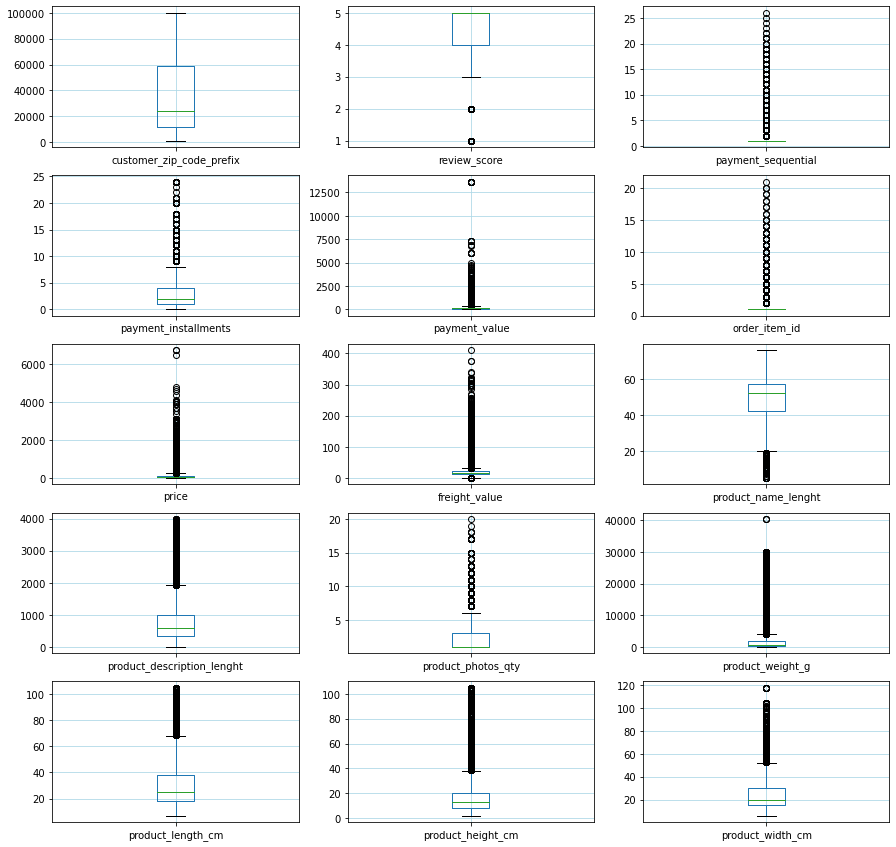

In [80]:
# boxplot of continuous variables
plt.figure(figsize=(15,15)) #creat plot area

c="red"
for index, plot_vars in enumerate(olist_cont): #plot_vars is a built-in function
    plt.subplot(5,3, index+1) # nrows, ncols, index
    ax=olist_cont.boxplot(column=plot_vars) # fill with color
    ax.set_facecolor('white') #sets background to white
    ax.grid(color="lightblue")


plt.show()



###### Payment_Sequential

In [81]:
olist.groupby(by='payment_sequential').count()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
payment_sequential,,,,,,,,,,,,,,,,,,,,,
1,109205,109205,109205,109205,109205,109205,109205,109205,109205,109205,...,109205,109204,109204,109204,109204,109205,109205,109205,109205,109205
2,3268,3268,3268,3268,3268,3268,3268,3268,3268,3268,...,3268,3268,3268,3268,3268,3268,3268,3268,3268,3268
3,632,632,632,632,632,632,632,632,632,632,...,632,632,632,632,632,632,632,632,632,632
4,304,304,304,304,304,304,304,304,304,304,...,304,304,304,304,304,304,304,304,304,304
5,181,181,181,181,181,181,181,181,181,181,...,181,181,181,181,181,181,181,181,181,181
6,124,124,124,124,124,124,124,124,124,124,...,124,124,124,124,124,124,124,124,124,124
7,85,85,85,85,85,85,85,85,85,85,...,85,85,85,85,85,85,85,85,85,85
8,55,55,55,55,55,55,55,55,55,55,...,55,55,55,55,55,55,55,55,55,55
9,44,44,44,44,44,44,44,44,44,44,...,44,44,44,44,44,44,44,44,44,44


In [82]:
olist[olist.payment_sequential>20]

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
5706,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,...,2.0,1300.0,50.0,9.0,41.0,bed_bath_table,25803.0,tres rios,RJ,36.20
5707,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,...,2.0,1300.0,50.0,9.0,41.0,bed_bath_table,25803.0,tres rios,RJ,36.20
5708,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,...,8.0,450.0,30.0,20.0,11.0,housewares,89217.0,joinville,SC,88.92
5798,ccf804e764ed5650cd8759557269dc13,92cd3ec6e2d643d4ebd0e3d6238f69e2,2017-06-07 12:05:10,2017-06-09 16:15:08,2017-06-16 15:50:28,2017-06-22 16:04:46,2017-06-28,569aa12b73b5f7edeaa6f2a01603e381,3266,sao paulo,...,1.0,1100.0,16.0,10.0,16.0,bed_bath_table,14940.0,ibitinga,SP,62.68
5800,ccf804e764ed5650cd8759557269dc13,92cd3ec6e2d643d4ebd0e3d6238f69e2,2017-06-07 12:05:10,2017-06-09 16:15:08,2017-06-16 15:50:28,2017-06-22 16:04:46,2017-06-28,569aa12b73b5f7edeaa6f2a01603e381,3266,sao paulo,...,1.0,1100.0,16.0,10.0,16.0,bed_bath_table,14940.0,ibitinga,SP,62.68
5806,ccf804e764ed5650cd8759557269dc13,92cd3ec6e2d643d4ebd0e3d6238f69e2,2017-06-07 12:05:10,2017-06-09 16:15:08,2017-06-16 15:50:28,2017-06-22 16:04:46,2017-06-28,569aa12b73b5f7edeaa6f2a01603e381,3266,sao paulo,...,1.0,1100.0,16.0,10.0,16.0,bed_bath_table,14940.0,ibitinga,SP,62.68
5807,ccf804e764ed5650cd8759557269dc13,92cd3ec6e2d643d4ebd0e3d6238f69e2,2017-06-07 12:05:10,2017-06-09 16:15:08,2017-06-16 15:50:28,2017-06-22 16:04:46,2017-06-28,569aa12b73b5f7edeaa6f2a01603e381,3266,sao paulo,...,1.0,1100.0,16.0,10.0,16.0,bed_bath_table,14940.0,ibitinga,SP,62.68
5808,ccf804e764ed5650cd8759557269dc13,92cd3ec6e2d643d4ebd0e3d6238f69e2,2017-06-07 12:05:10,2017-06-09 16:15:08,2017-06-16 15:50:28,2017-06-22 16:04:46,2017-06-28,569aa12b73b5f7edeaa6f2a01603e381,3266,sao paulo,...,1.0,1100.0,16.0,10.0,16.0,bed_bath_table,14940.0,ibitinga,SP,62.68
5815,ccf804e764ed5650cd8759557269dc13,92cd3ec6e2d643d4ebd0e3d6238f69e2,2017-06-07 12:05:10,2017-06-09 16:15:08,2017-06-16 15:50:28,2017-06-22 16:04:46,2017-06-28,569aa12b73b5f7edeaa6f2a01603e381,3266,sao paulo,...,1.0,1100.0,16.0,10.0,16.0,bed_bath_table,14940.0,ibitinga,SP,62.68
23996,285c2e15bebd4ac83635ccc563dc71f4,b246eeed30b362c09d867b9e598bee51,2017-12-08 12:00:04,2017-12-09 11:55:17,2017-12-11 18:42:21,2017-12-21 16:33:10,2018-01-03,2524dcec233c3766f2c2b22f69fd65f4,17604,tupa,...,1.0,541.0,19.0,12.0,16.0,electronics,5588.0,sao paulo,SP,40.85


In [83]:
x = olist[olist.order_id=='285c2e15bebd4ac83635ccc563dc71f4']
x[['payment_type','price','freight_value','payment_value','tot_order_amt']]
# yup, looks like a bunch of smaller payments/ vouchers were used

,payment_type,price,freight_value,payment_value,tot_order_amt
23994,voucher,29.0,11.85,1.75,40.85
23995,voucher,29.0,11.85,1.23,40.85
23996,voucher,29.0,11.85,1.05,40.85
23997,voucher,29.0,11.85,1.03,40.85
23998,voucher,29.0,11.85,1.96,40.85
23999,voucher,29.0,11.85,1.14,40.85
24000,voucher,29.0,11.85,1.05,40.85
24001,voucher,29.0,11.85,4.07,40.85
24002,voucher,29.0,11.85,1.70,40.85
24003,voucher,29.0,11.85,1.24,40.85


###### Payment Installments

In [84]:
olist[olist.payment_installments>10].price.mean()

251.3894352941177

###### **payment_value**

In [85]:
# let's look at the 0 payment-value
olist[olist.payment_value==0]
#  4 total, paid with voucher - curious - were those just refund/ exchange vouchers - maybe other vouchers had payments in addition

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
6916,8bcbe01d44d147f901cd3192671144db,f2def7f64f36952f2f5a9791f0285f34,2018-01-24 23:24:14,2018-01-24 23:37:20,2018-01-30 22:43:30,2018-02-02 21:26:42,2018-02-21,cc5aa1b8337e394da54980226bb0f6d4,21040,rio de janeiro,...,3.0,500.0,20.0,30.0,20.0,stationery,13232.0,campo limpo paulista,SP,74.16
15111,45ed6e85398a87c253db47c2d9f48216,8eab8f9b3c744b76b65f7a2c0c8f2d6c,2017-06-08 21:18:45,2017-06-08 21:30:18,2017-06-09 08:35:18,2017-06-22 17:44:53,2017-07-10,e4000306cf2f63714e6bb70dd20a6592,74595,goiania,...,2.0,400.0,18.0,11.0,20.0,perfumery,9015.0,santo andre,SP,71.14
49362,6ccb433e00daae1283ccc956189c82ae,843b211abe7b0264dd4a69eafc5bdf43,2017-10-26 23:51:35,2017-10-27 00:46:58,2017-10-27 19:53:03,2017-11-08 18:47:00,2017-11-22,677ad9cdca6c47c733f0cc6e23d7bb4c,25625,petropolis,...,2.0,3300.0,22.0,22.0,22.0,sports_leisure,95650.0,igrejinha,RS,122.04
54290,b23878b3e8eb4d25a158f57d96331b18,648121b599d98c420ef93f6135f8c80c,2017-05-27 19:20:24,2017-05-27 19:35:17,2017-05-29 04:49:37,2017-06-07 08:53:10,2017-06-29,9077449283dc1319d5e51fb3159b28e2,29230,anchieta,...,1.0,700.0,26.0,12.0,18.0,consoles_games,55325.0,brejao,PE,171.57


In [86]:
# let's look at orders where there was a voucher and more than one payment type
olist[olist.payment_sequential>1]

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
36,5cfd514482e22bc992e7693f0e3e8df7,519a8af813fe88578029697625439e8b,2017-10-13 17:19:17,2017-10-13 18:06:56,2017-10-16 19:42:28,2017-10-19 20:41:43,2017-11-06,e2381d9bb9b49c35fff077d4ae613816,38465,arapora,...,2.0,500.0,19.0,9.0,15.0,watches_gifts,6429.0,barueri,SP,710.58
50,b2bb080b6bc860118a246fd9b6fad6da,023042a5cd5724a563a100acb1cf89c9,2017-07-31 23:55:27,2017-08-01 00:43:21,2017-08-02 15:42:52,2017-08-08 20:30:04,2017-08-22,a6aa1df65dedcad75c34bbc175e5a068,85902,toledo,...,1.0,300.0,27.0,13.0,17.0,home_appliances,11704.0,praia grande,SP,197.92
98,3689194c14ad4e2e7361ebd1df0e77b0,40e2d0d7f6579118d9c02dcabf1fff65,2017-10-18 16:01:53,2017-10-19 16:14:29,2017-10-23 14:41:51,2017-10-26 16:08:57,2017-11-07,764bf13c9f7df277b9c0950b88b4c3eb,18550,boituva,...,1.0,850.0,20.0,25.0,20.0,furniture_decor,3204.0,sao paulo,SP,51.09
99,3689194c14ad4e2e7361ebd1df0e77b0,40e2d0d7f6579118d9c02dcabf1fff65,2017-10-18 16:01:53,2017-10-19 16:14:29,2017-10-23 14:41:51,2017-10-26 16:08:57,2017-11-07,764bf13c9f7df277b9c0950b88b4c3eb,18550,boituva,...,1.0,850.0,20.0,25.0,20.0,furniture_decor,3204.0,sao paulo,SP,51.09
100,3689194c14ad4e2e7361ebd1df0e77b0,40e2d0d7f6579118d9c02dcabf1fff65,2017-10-18 16:01:53,2017-10-19 16:14:29,2017-10-23 14:41:51,2017-10-26 16:08:57,2017-11-07,764bf13c9f7df277b9c0950b88b4c3eb,18550,boituva,...,1.0,850.0,20.0,25.0,20.0,furniture_decor,3204.0,sao paulo,SP,51.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116262,635b1de13b56852d3dca9d359b7ed8dd,4a0ca65ee54229ed1da47b1f479b0a55,2018-02-22 13:19:57,2018-02-22 14:00:46,2018-02-22 22:57:00,2018-03-08 22:36:28,2018-03-19,22dbae7e4d884fa06a81186305fbef4e,88215,bombinhas,...,7.0,800.0,30.0,15.0,15.0,luggage_accessories,3035.0,sao paulo,SP,76.18
117726,9e8253539b3ac1fc283b3d570f7b53ae,2c40b78414b1a68632e1b1ba2191543c,2017-10-16 16:41:25,2017-10-18 17:07:39,2017-10-20 20:54:50,2017-10-31 16:36:03,2017-11-07,f37fec46253718ba771b73228f000f8c,4652,sao paulo,...,1.0,9100.0,38.0,28.0,33.0,housewares,22640.0,rio de janeiro,RJ,235.19
117727,9e8253539b3ac1fc283b3d570f7b53ae,2c40b78414b1a68632e1b1ba2191543c,2017-10-16 16:41:25,2017-10-18 17:07:39,2017-10-20 20:54:50,2017-10-31 16:36:03,2017-11-07,f37fec46253718ba771b73228f000f8c,4652,sao paulo,...,1.0,9100.0,38.0,28.0,33.0,housewares,22640.0,rio de janeiro,RJ,235.19
117863,aca32a744ead78cb64a902170bf3147e,147d57c32f7addc4a7d0f123e7cc9c16,2018-05-21 11:49:15,2018-05-21 15:12:17,2018-05-25 14:45:00,2018-06-02 10:03:46,2018-06-12,ea2c23bb1b06634d34a8b32733c9df05,36080,juiz de fora,...,1.0,317.0,19.0,15.0,17.0,pet_shop,20930.0,rio de janeiro,RJ,138.85


In [87]:
# this order has 3 payment types listed
olist[olist.order_id=='e481f51cbdc54678b7cc49136f2d6af7'][['order_id','payment_sequential','payment_type','price','freight_value','payment_value','tot_order_amt']]
#confirmed - vouchers are not included in the payment_value, so you payment_values of R$0

,order_id,payment_sequential,payment_type,price,freight_value,payment_value,tot_order_amt
13865,e481f51cbdc54678b7cc49136f2d6af7,1,credit_card,29.99,8.72,18.12,38.71
13866,e481f51cbdc54678b7cc49136f2d6af7,3,voucher,29.99,8.72,2.00,38.71
13867,e481f51cbdc54678b7cc49136f2d6af7,2,voucher,29.99,8.72,18.59,38.71


In [88]:
olist.payment_value.describe()

count    114080.000000
mean        172.158157
std         266.169138
min           0.000000
25%          60.950000
50%         108.060000
75%         189.370000
max       13664.080000
Name: payment_value, dtype: float64

In [89]:
x = olist[olist.payment_value>10000]
x[x.order_id=='03caa2c082116e1d31e67e9ae3700499']

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
62398,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,...,3.0,750.0,16.0,16.0,16.0,fixed_telephony,3667.0,sao paulo,SP,1708.01
62399,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,...,3.0,750.0,16.0,16.0,16.0,fixed_telephony,3667.0,sao paulo,SP,1708.01
62400,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,...,3.0,750.0,16.0,16.0,16.0,fixed_telephony,3667.0,sao paulo,SP,1708.01
62401,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,...,3.0,750.0,16.0,16.0,16.0,fixed_telephony,3667.0,sao paulo,SP,1708.01
62402,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,...,3.0,750.0,16.0,16.0,16.0,fixed_telephony,3667.0,sao paulo,SP,1708.01
62403,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,...,3.0,750.0,16.0,16.0,16.0,fixed_telephony,3667.0,sao paulo,SP,1708.01
62404,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,...,3.0,750.0,16.0,16.0,16.0,fixed_telephony,3667.0,sao paulo,SP,1708.01
62405,03caa2c082116e1d31e67e9ae3700499,1617b1357756262bfa56ab541c47bc16,2017-09-29 15:24:52,2017-10-02 15:28:20,2017-10-10 15:43:17,2017-10-17 18:22:29,2017-10-23,0a0a92112bd4c708ca5fde585afaa872,20080,rio de janeiro,...,3.0,750.0,16.0,16.0,16.0,fixed_telephony,3667.0,sao paulo,SP,1708.01


###### Price

In [90]:
olist.price.describe()

count    114080.000000
mean        120.033734
std         182.478788
min           0.850000
25%          39.900000
50%          74.900000
75%         133.000000
max        6735.000000
Name: price, dtype: float64

In [91]:
p=olist[olist.price>2000]
p[p.order_id.duplicated(keep=False)].price.mean()

2938.4833333333336

###### Freight Value 

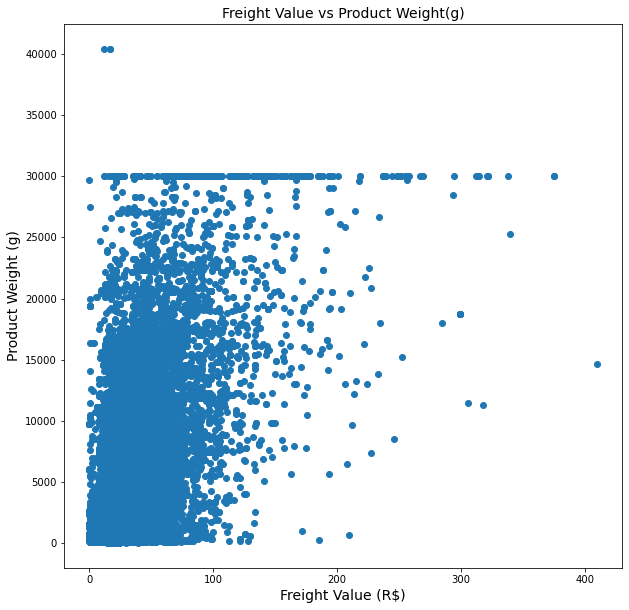

In [92]:
# plot frieght value + product weight
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(olist.freight_value,olist.product_weight_g)
ax.set_facecolor('white') #sets background to white
ax.set_xlabel('Freight Value (R$)', fontsize='14') # x label
ax.set_ylabel('Product Weight (g)', fontsize='14') # y label
ax.set_title('Freight Value vs Product Weight(g)', fontsize='14') # graph name
plt.show()

In [93]:
#interesting there appears to be a R$3,000 order cutoff, let's investigate
list(olist[olist.freight_value>300]['product_category_english'].unique())

['construction_tools_construction',
 'health_beauty',
 'housewares',
 'industry_commerce_and_business',
 'baby']

#### product weight
###### no to low weight

In [94]:
# what are the smallest values in the weight column
olist.nsmallest(1000, 'product_weight_g')['product_weight_g'].unique()

array([ 0.,  2., 25., 50., 53., 54., 55., 58., 60., 61., 63., 65., 67.,
       70., 75.])

In [95]:
# find those records with 0g or 2g of weight (the lowet 5 weights are 0, 2 , 25, 50, 53)
weights = range(0,2)
no_weight = olist[olist.product_weight_g.isin([0,2])]
no_weight[['order_id', 'product_id','product_weight_g', 'order_item_id']]

# only 2 where part of multi-item orders, I have to think anything with less than 25g in weight is a mistake, let's remove those


,order_id,product_id,product_weight_g,order_item_id
33479,06d9e69034388abf6da64378e10737b8,36ba42dd187055e1fbe943b2d11430ca,0.0,1.0
33480,06d9e69034388abf6da64378e10737b8,36ba42dd187055e1fbe943b2d11430ca,0.0,2.0
34877,4abc7b5330425bcf9c2f7f48151a88c0,8038040ee2a71048d4bdbbdc985b69ab,0.0,1.0
36152,a12196b6febf252a10f39f6d76ac0a8d,7ddb76f2c7237acc852358b95e7946a8,2.0,1.0
54877,476b812a7e4fc972646eb390517bddcb,e673e90efa65a5409ff4196c038bb5af,0.0,1.0
56648,3f50858a49c788f7633204f2fd7bf63f,f9fafac43d3416d92ecc303fdeb1743d,2.0,1.0
71526,d1129445a7d52481f5cd8c9198d4957e,5837bba0ce6e35e6f2dc5c3e223e3276,2.0,1.0
79193,62e27d060f7d7b3d2fd424b0e1d7adaa,ad7d07f5775feab3f20504d1ad3fff11,2.0,1.0
84804,200b121c28e10ef638131a7c76753327,81781c0fed9fe1ad6e8c81fca1e1cb08,0.0,1.0
88944,5ed3cdc2df4c7cb624fc3ac0f66d4a02,8aae4df46baf1278422b69edbb50bd35,2.0,1.0


In [96]:
no_weight

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
33479,06d9e69034388abf6da64378e10737b8,afef0047e43944e8c6630ec0d0f7de2e,2018-07-30 10:42:40,2018-07-31 09:10:11,2018-07-31 14:24:00,2018-08-09 22:18:29,2018-09-10,7dff353845a1d77a928dcb952c6bc966,45653,ilheus,...,1.0,0.0,30.0,25.0,30.0,bed_bath_table,14940.0,ibitinga,SP,123.85
33480,06d9e69034388abf6da64378e10737b8,afef0047e43944e8c6630ec0d0f7de2e,2018-07-30 10:42:40,2018-07-31 09:10:11,2018-07-31 14:24:00,2018-08-09 22:18:29,2018-09-10,7dff353845a1d77a928dcb952c6bc966,45653,ilheus,...,1.0,0.0,30.0,25.0,30.0,bed_bath_table,14940.0,ibitinga,SP,123.85
34877,4abc7b5330425bcf9c2f7f48151a88c0,d1568f1104d2015dc70bdf7d9ab88dd2,2018-07-31 21:05:49,2018-07-31 21:40:18,2018-08-01 16:00:00,2018-08-07 23:56:48,2018-08-17,93b52b7591ca73fc44cdac70146a1b0d,4904,sao paulo,...,1.0,0.0,30.0,25.0,30.0,bed_bath_table,14940.0,ibitinga,SP,144.39
36152,a12196b6febf252a10f39f6d76ac0a8d,a2a2b3024be00dfdd15cae8f8c526076,2018-03-10 12:45:26,2018-03-10 12:55:51,2018-03-13 16:12:41,2018-03-23 16:08:48,2018-03-29,050d3f286778f86639cf514104c1bb8c,83326,pinhais,...,2.0,2.0,11.0,11.0,52.0,stationery,6764.0,tabao da serra,SP,145.79
54877,476b812a7e4fc972646eb390517bddcb,18a1176652a9344ba489fa4ccaa3c20f,2018-08-18 11:09:12,2018-08-18 11:30:54,2018-08-21 12:07:00,2018-08-30 16:56:44,2018-09-12,387207b587c829c6678a03c8b711ae1e,72911,aguas lindas de goias,...,1.0,0.0,30.0,25.0,30.0,bed_bath_table,14940.0,ibitinga,SP,153.61
56648,3f50858a49c788f7633204f2fd7bf63f,b5d131af7951f37c72c8439e2eb9bf0b,2018-04-08 18:40:10,2018-04-09 18:35:17,2018-04-10 20:56:47,2018-04-25 20:48:56,2018-04-26,0cbaa74a511e52c7470f2c85f2ebd559,31578,belo horizonte,...,2.0,2.0,11.0,11.0,52.0,furniture_decor,6764.0,tabao da serra,SP,352.02
71526,d1129445a7d52481f5cd8c9198d4957e,f215bd697983e112b9b42330cf503c50,2018-06-20 19:41:16,2018-06-21 16:20:08,2018-06-27 17:22:00,2018-06-29 19:08:22,2018-07-05,11db78ab36d352319ed0e1ad277edf97,9540,sao caetano do sul,...,2.0,2.0,11.0,11.0,52.0,furniture_decor,6764.0,tabao da serra,SP,198.68
79193,62e27d060f7d7b3d2fd424b0e1d7adaa,ebc37754efcd5ef1954d9980073a6c00,2018-04-09 20:14:31,2018-04-09 20:30:14,2018-04-10 21:14:36,2018-04-16 19:55:33,2018-05-02,06b94cd5fa83f543bfa02bd8f18b56d1,26435,japeri,...,2.0,2.0,11.0,11.0,52.0,furniture_decor,6764.0,tabao da serra,SP,108.51
84804,200b121c28e10ef638131a7c76753327,26bcca10e5c9679c306d8333bf527929,2018-08-04 15:55:59,2018-08-04 16:10:16,2018-08-08 14:35:00,2018-08-23 18:21:59,2018-08-30,7e518b9896c26844bf24c1802c7d8775,75830,mineiros,...,1.0,0.0,30.0,25.0,30.0,bed_bath_table,14940.0,ibitinga,SP,119.89
88944,5ed3cdc2df4c7cb624fc3ac0f66d4a02,4a8ce9a8cb458c67086e351552936cd2,2018-06-07 22:36:58,2018-06-07 22:56:02,2018-06-11 18:22:00,2018-06-21 18:17:37,2018-07-16,abd388edf0df9d046ec7236bc00e89ce,95020,caxias do sul,...,2.0,2.0,11.0,11.0,52.0,furniture_decor,6764.0,tabao da serra,SP,129.60


In [97]:
no_weight.price.mean()

135.6192307692308

In [98]:
no_weight.freight_value.mean()

22.920769230769228

In [99]:
# get the order_id's so we can just dump them
index = no_weight.index
index


Int64Index([ 33479,  33480,  34877,  36152,  54877,  56648,  71526,  79193,
             84804,  88944,  95389,  95390, 118571],
           dtype='int64')

In [100]:
#drop those indexes from the data set
olist=olist.drop(index=index, axis=0)


###### Large Weights

In [101]:
# explore those weights around 30kg-40kg
weights = olist[olist.product_weight_g>29000]


In [102]:
weights[weights.product_weight_g>30000]

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
46308,4a45f9f66971302cf881ecfa142f42ba,ccd6a4af78390b7ae560c1cc1cb1a2ff,2017-12-23 19:03:24,2017-12-23 19:13:20,2017-12-28 15:13:58,2018-01-25 22:17:15,2018-01-29,32d0420a22921ea161d8bff0e0297b71,88820,icara,...,1.0,40425.0,13.0,65.0,28.0,bed_bath_table,14940.0,ibitinga,SP,96.32
47895,6ecf1a4051b4c5ed613624b460970a26,958279c23050d6207d196c3057648f6f,2017-11-17 08:40:57,2017-11-17 08:55:48,2017-11-17 20:36:56,2017-12-01 12:08:23,2017-12-06,de00290d2a997f24e1706fdc2d366a0e,11730,mongagua,...,1.0,40425.0,13.0,65.0,28.0,bed_bath_table,14940.0,ibitinga,SP,92.06
103342,9223919b300f6989e1715333fca0d6ce,51934b734e94e61d8efa4523e175c6c3,2018-03-01 23:05:31,2018-03-01 23:15:32,2018-03-02 22:33:58,2018-03-27 20:47:27,2018-03-26,4fbb5c68b6851f6e35c543f963b43e4c,86455,joaquim tavora,...,1.0,40425.0,13.0,65.0,28.0,bed_bath_table,14940.0,ibitinga,SP,96.32


#### Product Height

In [103]:
# description
olist.product_height_cm.describe()

count    114066.000000
mean         16.606316
std          13.439887
min           2.000000
25%           8.000000
50%          13.000000
75%          20.000000
max         105.000000
Name: product_height_cm, dtype: float64

In [104]:
# the boxplot shows outliers above 40cm
olist[olist.product_height_cm>40]

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
8,771ee386b001f06208a7419e4fc1bbd7,206c0fcc717333d169ff95933fb47341,2017-06-23 13:11:27,2017-06-23 13:25:19,2017-06-26 17:33:37,2017-07-03 15:59:46,2017-07-17,9a3526eee723accd014ec683afe5bf20,31230,belo horizonte,...,1.0,7000.0,26.0,47.0,27.0,housewares,13206.0,jundiai,SP,81.16
25,4214cda550ece8ee66441f459dc33a8c,be4ecdb7c9401fd98ed01456634cfcb2,2017-03-21 17:39:19,2017-03-21 17:39:19,2017-03-22 10:26:53,2017-03-30 15:05:20,2017-04-25,79403f8240aafdd83128106b5b48fd43,68485,pacaja,...,1.0,3045.0,55.0,60.0,30.0,baby,85603.0,francisco beltrao,PR,170.57
47,f9d0ec2fa088ac583e1ccd15b6686073,2b9c9e251dbb2a2a768fd48fbf151e4c,2017-02-28 15:19:04,2017-02-28 19:18:23,2017-03-03 13:46:45,2017-03-14 17:29:09,2017-03-29,35aebf263a4418be92141cc28421c0e0,32150,contagem,...,1.0,4225.0,45.0,55.0,16.0,office_furniture,8577.0,itaquaquecetuba,SP,89.68
69,e8977f709bbb0367f51b589e6325f991,b7f69471fed8a036911323fca290a2c2,2017-11-13 21:37:15,2017-11-13 21:50:33,2017-11-14 22:38:39,2017-11-16 19:25:51,2017-11-27,5ceed695eeb968efc7959d859a902e00,8771,mogi das cruzes,...,1.0,17300.0,40.0,70.0,40.0,housewares,8275.0,sao paulo,SP,132.51
71,1ffb3c1929b16d9c1aec1958e11b3e9b,15e65458c1de2332a93656f2272c808e,2018-06-30 13:37:47,2018-07-05 16:27:01,2018-07-03 14:13:00,2018-07-09 20:41:43,2018-07-25,78fc10170ee499077d81e1ed7b03fe6e,6670,itapevi,...,7.0,5400.0,20.0,60.0,50.0,toys,81770.0,curitiba,PR,166.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119078,df8ab61cb615d551483618533aceb364,3922d6a8ed0273142c88d1d9fa62f3ad,2017-08-03 12:08:45,2017-08-03 14:35:19,2017-08-07 14:37:22,2017-08-21 18:20:18,2017-09-05,dfbaa905d79219afc7a10c45702ee9af,45860,canavieiras,...,4.0,16100.0,61.0,61.0,18.0,auto,89560.0,videira,SC,713.65
119085,02661696e065aa02977870f3a87940ab,e3495901f796d61ae2604a9784306f61,2017-12-14 20:52:16,2017-12-14 20:59:28,2017-12-19 16:58:55,2017-12-21 19:16:26,2018-01-09,88e0eef78a2c8acebf5e23425588e21d,13871,sao joao da boa vista,...,2.0,5550.0,28.0,55.0,37.0,stationery,13232.0,campo limpo paulista,SP,92.57
119093,7e3db8d87e79e50d7a08312194e1cf01,15ff28a1c17f0fe90484f845261b81ff,2018-05-01 12:49:47,2018-05-01 13:36:11,2018-05-03 15:14:00,2018-05-04 21:17:22,2018-05-15,973d12101223d02a36808d830e89ac3c,93510,novo hamburgo,...,1.0,2600.0,62.0,42.0,13.0,housewares,91510.0,porto alegre,RS,164.46
119103,a2189edb3c692c5c1ff9dfcb7a4c2208,da0481fffc899341bd69b4aa17ceb64c,2017-12-09 23:17:50,2017-12-09 23:30:20,2017-12-12 01:18:59,2017-12-22 19:48:58,2018-01-11,7755ab0ce3d764fb730609e400db20cd,35360,sao pedro dos ferros,...,1.0,13850.0,35.0,95.0,25.0,home_appliances_2,6080.0,osasco,SP,268.13


In [105]:
olist[olist.product_height_cm>=105]

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
951,9c0bd8cd0fc8231ed50c066058917360,2896914daa531536d8c68d2d9bf15198,2018-05-15 02:12:21,2018-05-15 02:35:31,2018-05-15 13:22:00,2018-05-16 17:08:59,2018-05-25,4d3ee61f36901469e814fa28a102edda,6266,osasco,...,4.0,11325.0,18.0,105.0,30.0,industry_commerce_and_business,7031.0,guarulhos,SP,132.68
1203,15623f35d6d5eaa2fcd185a613927e86,02548f54167adc674352fe5b7825ffcf,2018-04-18 19:04:52,2018-04-20 07:32:14,2018-04-26 09:29:00,2018-05-10 20:11:39,2018-05-21,93541741ba99116c5cf5773312eff953,78080,cuiaba,...,4.0,11325.0,18.0,105.0,30.0,industry_commerce_and_business,7031.0,guarulhos,SP,131.80
3667,7b4cc813e327ec14c78f547a763f46b8,725ba0268900143556050bd3513a3369,2018-03-08 15:59:45,2018-03-08 16:31:38,2018-03-15 19:46:25,2018-03-29 23:23:20,2018-03-29,6c1a470cc3b59370f0c874af9d0959dc,37540,santa rita do sapucai,...,3.0,10550.0,30.0,105.0,20.0,electronics,6162.0,osasco,SP,399.35
5943,9d32e14ab99f206e6f8f2b6ad13baabf,ff73a759cba534dba02faaffdeb00e61,2018-03-09 12:01:33,2018-03-09 12:15:33,2018-03-09 21:55:20,2018-04-03 20:26:24,2018-04-06,cf96f6830f6e50b7dcba257a163e465c,12701,cruzeiro,...,2.0,30000.0,42.0,105.0,47.0,sports_leisure,86600.0,rolandia,PR,434.24
6722,c5732e63477fd9b1c12f62ad4472fc6c,3dfe77e7e9e11249eab5f54ff0c8e26d,2018-01-18 01:16:32,2018-01-18 01:30:54,2018-01-19 20:46:50,2018-02-16 17:47:06,2018-03-12,831c086692f020a200828871ca93df1d,68901,macapa,...,2.0,7050.0,20.0,105.0,20.0,sports_leisure,13250.0,itatiba,SP,129.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110911,352624ca0ead1f999686becd48b614c8,24166bfd53de2666b724977e4e7e15b2,2018-01-17 23:13:08,2018-01-17 23:29:54,2018-01-23 19:42:08,2018-01-29 23:47:49,2018-02-21,ed8c0cdc8daef34e11d13ebca6ea8380,95330,veranopolis,...,4.0,11325.0,18.0,105.0,30.0,industry_commerce_and_business,7031.0,guarulhos,SP,131.05
112522,41479e5eeb4f7ae644e524566a85a66e,68a97ec8181a655c6c192f77f71861da,2017-06-23 00:00:43,2017-06-24 02:25:11,2017-06-26 17:03:39,2017-06-30 13:09:44,2017-07-17,2ac0a65015448e0815d4d943a3870e3c,13225,varzea paulista,...,1.0,3450.0,16.0,105.0,55.0,sports_leisure,86600.0,rolandia,PR,181.48
112843,c8a4aa3a9990bffa86204adb8fa2dc37,e805a2d89df2d760a6ad978b424cd561,2017-11-29 18:06:16,2017-12-01 17:59:31,2017-12-04 23:48:36,2017-12-16 01:41:56,2017-12-19,98c438e19ccdab086f626596cbc5465c,14783,barretos,...,2.0,7050.0,20.0,105.0,20.0,sports_leisure,13250.0,itatiba,SP,115.32
115372,7416fe84ef0fab161c4990ff538a07bc,8c6eb8cc62ec4775e56cd5a96647bad4,2018-04-08 21:15:14,2018-04-08 21:29:32,2018-04-09 18:03:19,2018-04-10 19:08:55,2018-04-20,fde5f089df2dfe06fdc16a0feb34c3ec,4719,sao paulo,...,2.0,7050.0,20.0,105.0,20.0,sports_leisure,13250.0,itatiba,SP,111.60


##### product length

In [106]:
olist.product_length_cm.describe()

count    114066.000000
mean         30.290612
std          16.157981
min           7.000000
25%          18.000000
50%          25.000000
75%          38.000000
max         105.000000
Name: product_length_cm, dtype: float64

In [107]:
# boxplot shows something going on above 60cm in length
olist[olist.product_length_cm>60]

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
46,595f598849d89203c28d05d0fbf3f92e,cefab390926b6fc3de3ca94c82ebb1ba,2017-09-25 16:38:46,2017-09-25 17:10:25,2017-09-27 17:09:40,2017-10-02 20:55:55,2017-10-19,bf635aadfff238fd7e9b0d25e800d019,5171,sao paulo,...,1.0,7000.0,70.0,21.0,16.0,furniture_decor,15075.0,sao jose do rio preto,SP,26.58
146,243312dbb316253ab77bb0140d94803c,680e38a70d371582570f41cc47dc2791,2018-03-17 08:21:08,2018-03-17 08:49:39,2018-03-19 19:12:11,2018-03-21 12:24:26,2018-04-05,713110abe5de675d1513356694fe095a,13503,rio claro,...,1.0,11600.0,65.0,19.0,47.0,cool_stuff,3821.0,sao paulo,SP,285.79
201,14c0c0bebe2cd50fb1dbdee84fbae03a,7ac0cc6086ab6987cb2bf47141b2288a,2018-01-04 14:05:07,2018-01-04 14:15:30,2018-01-08 20:46:20,2018-01-17 16:42:05,2018-01-29,43fee0c28d0149eef54898d1d877a3e2,13635,pirassununga,...,1.0,6400.0,63.0,11.0,63.0,auto,7112.0,guarulhos,SP,180.55
204,53035288acc866ee15423b4293722b46,12ea47b284521261ac272de65bbb3506,2018-01-19 09:43:55,2018-01-19 09:53:17,2018-01-19 19:06:48,2018-02-08 23:39:28,2018-02-21,b2d586d74e65779de4810d7e17d33a6f,60115,fortaleza,...,3.0,14600.0,84.0,8.0,84.0,furniture_decor,36500.0,uba,MG,375.74
260,c1b770015e27aaf2b475026989d04fe0,86c0159e4a9735e1a0ab95bf4c7958f1,2017-12-11 11:40:32,2017-12-12 03:56:25,2017-12-18 21:52:53,2017-12-19 12:34:57,2017-12-28,9f6ab3755da328c4f8c77b8c7a642177,85807,cascavel,...,3.0,2450.0,105.0,3.0,70.0,furniture_decor,85802.0,cascavel,PR,137.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119084,9bb6a265f3bbeee30eefc244d21ae1d3,b8c87b84c9734273f3a1db3e61ef3ede,2017-07-29 09:01:31,2017-07-29 09:15:12,2017-08-03 17:55:06,2017-08-08 19:48:02,2017-08-29,5e0b5a6c58597a3a1377a75ab7f268e5,26285,nova iguacu,...,1.0,1600.0,100.0,7.0,11.0,sports_leisure,92030.0,canoas,RS,120.09
119090,887fd510f45be7bea78ff0a3b0b334e2,bc9339cfc8fa218c5a478fae319251a2,2018-03-20 11:32:27,2018-03-20 11:49:59,2018-03-21 19:03:39,2018-04-04 14:21:46,2018-04-12,56984d6d382b49a6378dff7d6d024336,13080,campinas,...,1.0,750.0,69.0,11.0,11.0,furniture_decor,80310.0,curitiba,PR,76.29
119093,7e3db8d87e79e50d7a08312194e1cf01,15ff28a1c17f0fe90484f845261b81ff,2018-05-01 12:49:47,2018-05-01 13:36:11,2018-05-03 15:14:00,2018-05-04 21:17:22,2018-05-15,973d12101223d02a36808d830e89ac3c,93510,novo hamburgo,...,1.0,2600.0,62.0,42.0,13.0,housewares,91510.0,porto alegre,RS,164.46
119111,803e822a03730624352b85d6bb2727c3,71a1cb321823bfbc0f0665edca5b63e5,2018-01-08 15:09:19,2018-01-08 15:17:20,2018-01-09 17:27:33,2018-01-26 21:14:25,2018-02-02,7d53407a511f2a7476541a688c962833,4194,sao paulo,...,3.0,10150.0,89.0,15.0,40.0,housewares,88303.0,itajai,SC,298.22


In [108]:
olist[olist.product_length_cm==105]

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
260,c1b770015e27aaf2b475026989d04fe0,86c0159e4a9735e1a0ab95bf4c7958f1,2017-12-11 11:40:32,2017-12-12 03:56:25,2017-12-18 21:52:53,2017-12-19 12:34:57,2017-12-28,9f6ab3755da328c4f8c77b8c7a642177,85807,cascavel,...,3.0,2450.0,105.0,3.0,70.0,furniture_decor,85802.0,cascavel,PR,137.73
266,afd0dbbab8e90d099aaccdd8ed7d5f26,6ce21a80311ab8b07f36944962b01681,2018-06-14 17:20:31,2018-06-14 17:40:01,2018-06-15 13:05:00,2018-06-18 21:22:15,2018-06-28,d1c191b64557c7c27229ac1bc45c2507,81260,curitiba,...,8.0,9350.0,105.0,15.0,28.0,sports_leisure,83605.0,campo largo,PR,269.46
703,dd3d73f70b77e2a07f64360620621ca4,38f1fb4bd44289ca591479b76905cdbf,2018-01-02 09:45:15,2018-01-02 09:54:22,2018-01-02 17:19:20,2018-01-04 12:41:45,2018-01-18,628bdd93abd27fbdd50f4e2e91ec64b3,4616,sao paulo,...,1.0,1500.0,105.0,4.0,15.0,furniture_decor,4696.0,sao paulo,SP,262.94
823,906f47e5cb0a80530bf2e789e6e6a0cd,c0c2bf66c5b4f939ddc5b00d504b6ebb,2018-06-11 14:57:36,2018-06-11 15:19:47,2018-06-12 13:08:00,2018-06-19 23:48:40,2018-06-28,2665614dba3f17c76aafc27613cd6361,11250,bertioga,...,2.0,27000.0,105.0,18.0,35.0,industry_commerce_and_business,7074.0,guarulhos,SP,179.92
851,539a1383b0bd9b963044945e607f1aca,3ae277cd8512be9edcf79c749218d3a0,2018-04-02 23:12:00,2018-04-02 23:28:03,2018-04-04 21:58:25,2018-04-13 23:08:48,2018-04-20,60c3be08ced32a29639cae284b204bb1,25956,teresopolis,...,4.0,250.0,105.0,13.0,13.0,watches_gifts,13170.0,sumare,SP,188.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117384,65d13486abbd44fdd686246bc21c5b75,2300457c28afe54edb4da376808a8781,2018-04-06 11:28:12,2018-04-07 02:48:24,2018-04-09 19:53:24,2018-04-26 19:26:40,2018-05-10,4c581027a6bd52c46aaca848e6e0aebe,23017,rio de janeiro,...,4.0,7350.0,105.0,10.0,40.0,air_conditioning,14075.0,ribeirao preto,SP,224.87
117467,86ca18fcf43d6167ec5e02d77fb0958b,420621f1b13e83668fc4b8db1e614131,2018-04-19 17:33:04,2018-04-19 18:30:46,2018-04-24 16:48:33,2018-04-25 17:15:26,2018-05-08,d8f434868a10549c8270e44df5bfaaad,13036,campinas,...,9.0,8350.0,105.0,12.0,45.0,musical_instruments,4378.0,sao paulo,SP,95.11
118457,5f126df05a309c7dfe7ab136cb03ae08,5c74e38cb38fa7319244280d172667eb,2018-07-20 16:24:27,2018-07-20 16:35:21,2018-07-27 14:47:00,2018-08-03 13:31:48,2018-08-17,32e3357880db81aeae23bae1337c6e63,98975,campina das missoes,...,3.0,2400.0,105.0,3.0,70.0,furniture_decor,85802.0,cascavel,PR,170.00
118596,cc7dfc8992e6aaa96f3248ff602ee264,aacd86ff2dcccca69c8300e7312df450,2018-03-25 10:35:22,2018-03-25 10:47:55,2018-03-26 22:12:22,2018-04-09 20:08:47,2018-04-12,475b371565fac3dde82974b8c43b89ed,12608,lorena,...,3.0,1900.0,105.0,15.0,15.0,sports_leisure,14312.0,batatais,SP,132.72


##### Product Width

In [109]:
olist.product_width_cm.describe()

count    114066.000000
mean         23.103598
std          11.738520
min           6.000000
25%          15.000000
50%          20.000000
75%          30.000000
max         118.000000
Name: product_width_cm, dtype: float64

In [110]:
olist[olist.product_width_cm>50]

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
126,de4090fd9b7900d46323b0c7c36b7128,6f750933c4466edfcd08b82f4ddfd920,2018-05-05 10:27:28,2018-05-05 10:35:22,2018-05-07 14:11:00,2018-05-11 23:58:49,2018-05-30,89d4ec26627e7fe35be69c0512748842,9330,maua,...,1.0,9950.0,47.0,20.0,60.0,housewares,37650.0,camanducaia,MG,121.45
155,c51dcdd98e1c413f3d394ffcb4656ed1,555c1dc901d3cae90a9d452d888865c5,2018-08-19 19:28:08,2018-08-20 12:55:30,2018-08-21 13:07:00,2018-08-25 15:28:33,2018-08-31,0748f90b4f757729bbbc4d1ea60a0757,3942,sao paulo,...,1.0,5900.0,35.0,13.0,55.0,housewares,35501.0,divinopolis,MG,110.11
201,14c0c0bebe2cd50fb1dbdee84fbae03a,7ac0cc6086ab6987cb2bf47141b2288a,2018-01-04 14:05:07,2018-01-04 14:15:30,2018-01-08 20:46:20,2018-01-17 16:42:05,2018-01-29,43fee0c28d0149eef54898d1d877a3e2,13635,pirassununga,...,1.0,6400.0,63.0,11.0,63.0,auto,7112.0,guarulhos,SP,180.55
204,53035288acc866ee15423b4293722b46,12ea47b284521261ac272de65bbb3506,2018-01-19 09:43:55,2018-01-19 09:53:17,2018-01-19 19:06:48,2018-02-08 23:39:28,2018-02-21,b2d586d74e65779de4810d7e17d33a6f,60115,fortaleza,...,3.0,14600.0,84.0,8.0,84.0,furniture_decor,36500.0,uba,MG,375.74
229,1594012ccc1b0770373ce691d697e5ae,e957d597f76d275f40a848397fb6c7c3,2018-04-23 19:05:57,2018-04-24 19:17:00,2018-04-24 12:48:39,2018-04-27 22:08:35,2018-05-08,ccc2dbe64dde140fb3dbb127091e50a9,9530,sao caetano do sul,...,4.0,5967.0,48.0,37.0,53.0,bed_bath_table,14940.0,ibitinga,SP,362.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118786,89e551559b137dc03d8b5cd618b523e8,ea67ed93ddaa0bf58279b76e78b9635a,2018-04-26 17:00:28,2018-04-26 17:31:57,2018-05-02 13:25:00,2018-05-03 18:24:56,2018-05-09,502efad234d31eb84df82019d85ad6d4,8531,ferraz de vasconcelos,...,1.0,5200.0,25.0,35.0,55.0,cool_stuff,3470.0,sao paulo,SP,71.05
119012,ce447c4109907439fcfc1013c8a242d4,f2e656212075aca396c7b6cfc8a64168,2018-03-27 15:55:20,2018-03-27 16:08:50,2018-04-02 23:27:36,2018-04-04 18:52:39,2018-04-09,bb315046ce367f23b45ecfc8a89a5abc,4736,sao paulo,...,1.0,14050.0,58.0,20.0,58.0,office_furniture,13843.0,mogi guacu,SP,194.38
119055,0f121110b75ef7c38c79d67833c49830,d506a6e68d7d209947cc3fb558a3a09c,2017-09-14 10:12:04,2017-09-14 10:25:47,2017-09-28 15:03:58,2017-10-10 15:13:21,2017-10-23,ae53a87a257f8e54795af6ff434e443b,45445,camamu,...,1.0,29050.0,55.0,75.0,61.0,health_beauty,3908.0,sao paulo,SP,956.86
119060,989c8bed4ad2e187516317b3e12f44c0,52efe753f546446eb1a37bb701656442,2018-03-29 13:57:31,2018-03-29 14:10:05,2018-04-04 17:38:41,2018-04-14 16:33:01,2018-04-19,346d36ab9457852dc5a4ca06a38130ee,33172,santa luzia,...,1.0,5950.0,65.0,11.0,65.0,auto,7112.0,guarulhos,SP,169.62


In [111]:
olist[olist.product_width_cm==105]

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_english,seller_zip_code_prefix,seller_city,seller_state,tot_order_amt
8655,fc1d26c4d0639d4e8f684b618b355146,a6314abf76ef0a93e6821a5e9c925de1,2017-06-04 16:07:59,2017-06-04 16:22:09,2017-06-05 14:05:56,2017-06-06 09:10:56,2017-06-19,0b2b77a2b299cdd32e3ff49631232369,4016,sao paulo,...,3.0,600.0,50.0,8.0,105.0,health_beauty,3655.0,sao paulo,SP,239.45
27134,278b6dc641ac6cf9abcfb8b2aa95a0d0,28e769bf73caf3dc734588072640486c,2017-02-01 15:41:43,2017-02-01 15:50:11,2017-02-02 08:50:00,2017-02-13 07:38:37,2017-03-20,622db09504308011ed01e179e89d0925,45400,valenca,...,3.0,600.0,50.0,8.0,105.0,health_beauty,3655.0,sao paulo,SP,221.84
33735,4abe45d3258a19bc521cdd64b940acf1,9fad0cbea18c67d95c21db7c76670226,2017-06-20 21:01:58,2017-06-20 21:15:14,2017-06-29 16:57:25,2017-07-04 13:35:39,2017-07-04,4b0f4c2619f2f9ca0695227953e5f3ed,8420,sao paulo,...,2.0,5000.0,45.0,14.0,105.0,musical_instruments,9720.0,sao bernardo do campo,SP,410.03
56283,d5d5a70a76401ecc139ee16c5299df4d,11529689a3fdf79b53cf853daf570b16,2018-05-23 20:29:40,2018-05-23 20:57:21,2018-05-24 15:14:00,2018-05-30 17:21:33,2018-06-11,1b5a1fb128d2fb23ffc39090575c46ad,13219,jundiai,...,4.0,25000.0,27.0,23.0,105.0,cool_stuff,3087.0,sao paulo,SP,693.59
76078,cdd55639e282b90007cac9a8ea6a7798,6065fad852344e668bc2352e47d3db07,2017-10-20 16:53:16,2017-10-20 17:14:09,2017-10-20 22:32:49,2017-10-26 19:18:11,2017-11-01,d26c18f646566e96348d5782c71d9453,5884,sao paulo,...,1.0,5850.0,40.0,9.0,105.0,musical_instruments,9720.0,sao bernardo do campo,SP,509.81
79473,826ca7e23c4d14c9beb4791e24239327,b613e8d4d389f24b5c1d80cc176ca3e3,2017-06-13 03:24:05,2017-06-13 03:35:16,2017-06-13 15:29:51,2017-06-14 12:09:39,2017-06-27,f22492bbb347c680e930c2d2b64d510e,5016,sao paulo,...,3.0,600.0,50.0,8.0,105.0,health_beauty,3655.0,sao paulo,SP,240.41
80523,1a4ed278e4797230fbc18916eb8e8dae,8dad82945d0eeea58e2e91b451171710,2018-01-14 18:45:26,2018-01-15 18:51:15,2018-01-16 23:18:54,2018-01-30 00:51:42,2018-02-16,d1e0fb86f20227e637a396406b09f6ff,48605,paulo afonso,...,2.0,5000.0,45.0,14.0,105.0,musical_instruments,9720.0,sao bernardo do campo,SP,449.80
91553,0680b3722414028009984ae5c04c5df0,a95bf627a6d55bc2194028e5648c0fdd,2017-06-06 13:42:46,2017-06-06 13:55:17,2017-06-07 17:36:23,2017-06-17 06:18:00,2017-06-20,226ad1e04e75266d492bcb6bea70939c,8370,sao paulo,...,3.0,600.0,50.0,8.0,105.0,health_beauty,3655.0,sao paulo,SP,229.72
91812,d40e7a80365572af2e27d31a9cf79169,d01c7d818c6b39a0657b11a9e85f99d2,2017-06-27 14:26:48,2017-06-27 14:43:58,2017-06-28 09:10:19,2017-07-04 16:02:38,2017-07-17,92b80c0469a342c21683275fb38ffd60,18530,tiete,...,3.0,600.0,50.0,8.0,105.0,health_beauty,3655.0,sao paulo,SP,264.08
93577,2a3a8593aad8c5ddedc827304dfedbab,9175f906b8ad6c804df1837458e0da1c,2017-07-19 19:43:14,2017-07-19 20:03:10,2017-07-20 18:25:39,2017-07-21 20:27:25,2017-08-01,008778a1591d49f6b2464dffaa4fa662,3912,sao paulo,...,3.0,600.0,50.0,8.0,105.0,health_beauty,3655.0,sao paulo,SP,260.55


### Duplicates

In [112]:
# show the number of duplicated records in the dataframe
dups = olist[olist.duplicated()].count()
dups

order_id                         0
customer_id                      0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_name_lenght              0
product_description_

### **------Simple Stats------**

In [113]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114067 entries, 0 to 119147
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114067 non-null  object        
 1   customer_id                    114067 non-null  object        
 2   order_purchase_timestamp       114067 non-null  datetime64[ns]
 3   order_approved_at              114067 non-null  datetime64[ns]
 4   order_delivered_carrier_date   114067 non-null  datetime64[ns]
 5   order_delivered_customer_date  114067 non-null  datetime64[ns]
 6   order_estimated_delivery_date  114067 non-null  datetime64[ns]
 7   customer_unique_id             114067 non-null  object        
 8   customer_zip_code_prefix       114067 non-null  int64         
 9   customer_city                  114067 non-null  object        
 10  customer_state                 114067 non-null  object        
 11  

In [187]:
olist.payment_type.unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [140]:
#Describe variables in a table, keeping only descriptive variables (removed ID#s, zip codes, timestamps, ect.)
np.round(olist.agg(
    {
        'price': ['count', 'mean', 'median', 'var', 'min', 'max'],
        'payment_value': ['count', 'mean', 'median', 'var', 'min', 'max'],
        'tot_order_amt': ['count', 'mean', 'median', 'var', 'min', 'max'],
        'freight_value' : ['count', 'mean', 'median', 'var', 'min', 'max'],
        'payment_installments': ['count', 'mean', 'median', 'var', 'min', 'max'],
        'review_score':['count', 'mean', 'median', 'var', 'min', 'max'],
        'product_weight_g':['count', 'mean', 'median', 'var', 'min', 'max'],
        'product_length_cm': ['count', 'mean', 'median', 'var', 'min', 'max'],
        'product_height_cm':['count', 'mean', 'median', 'var', 'min', 'max'],
        'product_width_cm':['count', 'mean', 'median', 'var', 'min', 'max'],
        'product_name_lenght':['count', 'mean', 'median', 'var', 'min', 'max'],
        'product_description_lenght':['count', 'mean', 'median', 'var', 'min', 'max'],
        'product_photos_qty':['count', 'mean', 'median', 'var', 'min', 'max'],
        'product_category_english': ['count'],
        'customer_city' : ['count'],
        'customer_state':['count'],
        'seller_city':['count'],
        'seller_state':['count']
    }
),2).T  #Transformed the table to have statistics going across to reduce size of the graphic. Limited to 2 decimal points.

,count,max,mean,median,min,var
price,118315.0,6735.00,120.65,74.90,0.85,33896.35
payment_value,119148.0,13664.08,172.74,108.16,0.00,71700.79
tot_order_amt,118315.0,6929.31,140.68,92.02,6.08,36572.62
freight_value,118315.0,409.68,20.03,16.28,0.00,250.80
payment_installments,119148.0,24.00,2.94,2.00,0.00,7.72
review_score,119148.0,5.00,4.00,5.00,1.00,2.00
product_weight_g,118295.0,40425.00,2112.33,700.00,0.00,14339232.16
product_length_cm,118295.0,105.00,30.27,25.00,7.00,262.08
product_height_cm,118295.0,105.00,16.62,13.00,2.00,181.01
product_width_cm,118295.0,118.00,23.08,20.00,6.00,138.05


In [186]:
#Describe the summary statistics of continuous variables in table

olist.describe(include = "object").T

,count,unique,top,freq
order_id,119148,99440,895ab968e7bb0d5659d16cd74cd1650c,63
customer_id,119148,99440,270c23a11d024a44c896d1894b261a83,63
order_status,119148,8,delivered,115728
customer_unique_id,119148,96095,9a736b248f67d166d2fbb006bcb877c3,75
customer_city,119148,4119,sao paulo,18876
customer_state,119148,27,SP,50265
review_id,119148,99172,eef5dbca8d37dfce6db7d7b16dd0525e,63
review_comment_title,14189,4600,Recomendo,498
review_comment_message,51247,36920,Muito bom,259
payment_type,119148,5,credit_card,87784


### Start with some basic plotting

In [141]:
# start with some basic plotting
# this python magics will allow plot to be embedded into the notebook
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

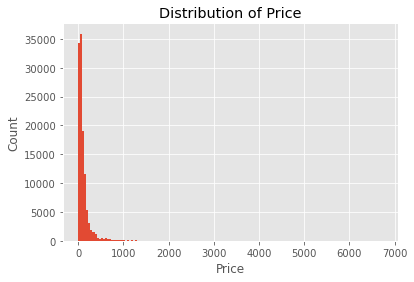

In [165]:
#Simple histogram plot of price distribution
plt.style.use('ggplot')

plt.hist(x=olist.price, bins = 150) #sets number of bins. Max price is 6.7K, so the graph is heavily skewed. 
plt.title('Distribution of Price') #labels
plt.xlabel('Price')
plt.ylabel('Count')

plt.show()


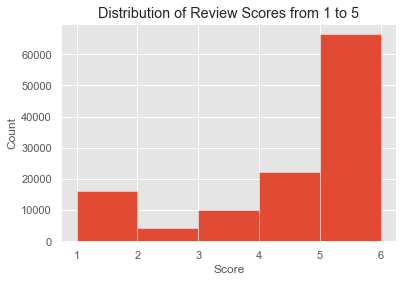

In [193]:
#Simple histogram plot of review distribution
plt.style.use('ggplot')


plt.hist(olist.review_score, bins= [1,2,3,4,5,6]) #Specifying bin edges to make 5 categories. 


plt.title('Distribution of Review Scores from 1 to 5') #labels
plt.xlabel('Score')
plt.ylabel('Count')


plt.show()


In [142]:
#date features: day of week and month of order_purchase using purchase timestamp. Further converted to categorical data type.
olist['purchase_wk_day'] = olist.copy()['order_purchase_timestamp'].dt.day_name().astype('category')


olist['purchase_wk_day'].unique()

['Wednesday', 'Tuesday', 'Monday', 'Friday', 'Sunday', 'Thursday', 'Saturday']
Categories (7, object): ['Wednesday', 'Tuesday', 'Monday', 'Friday', 'Sunday', 'Thursday', 'Saturday']

In [143]:
# create a column for purchase month in regular english
olist['purchase_month'] = olist.copy()['order_purchase_timestamp'].dt.month_name().astype('category')

olist['purchase_month'].unique()

['April', 'June', 'December', 'May', 'July', ..., 'March', 'January', 'September', 'October', 'February']
Length: 12
Categories (12, object): ['April', 'June', 'December', 'May', ..., 'January', 'September', 'October', 'February']

In [144]:
# subset months and price (month spent on items, not including shipping)

olist_sub = olist[['price','purchase_month']]

month_price = olist_sub.groupby(by='purchase_month').sum()
month_price = month_price.sort_values(['price'])
month_price

,price
purchase_month,
September,665744.57
October,748926.23
December,773733.81
November,1055072.10
January,1123596.81
February,1151791.05
June,1366920.50
April,1424340.98
March,1427707.11


In [146]:
month_price.index.values



['September', 'October', 'December', 'November', 'January', ..., 'April', 'March', 'July', 'August', 'May']
Length: 12
Categories (12, object): ['April', 'August', 'December', 'February', ..., 'May', 'November', 'October', 'September']

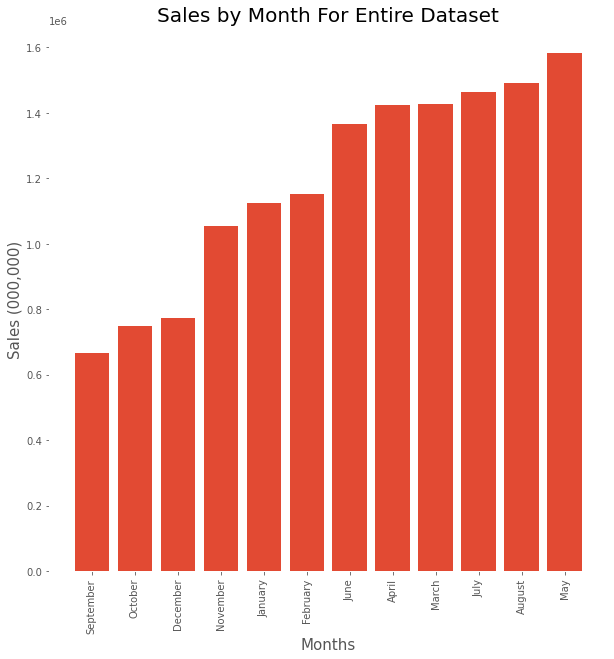

In [145]:
# plot some of these continuous varialbes
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(10,10), facecolor='w') # create figure on an axes, determine size
ax.bar(month_price.index.values, month_price.price, label="linear") # plot the data month_price created above in barchart
plt.xticks(month_price.index.values, month_price.index.values, rotation='vertical') # makes xticks vericle vs horizontal
ax.set_facecolor('white') #sets background to white
ax.set_xlabel('Months', fontsize='15') # x label
ax.set_ylabel('Sales (000,000)', fontsize='15') # y label
ax.set_title('Sales by Month For Entire Dataset', fontsize='20') # graph name
plt.show()

### Explore Joint Attributes
###### Graphs

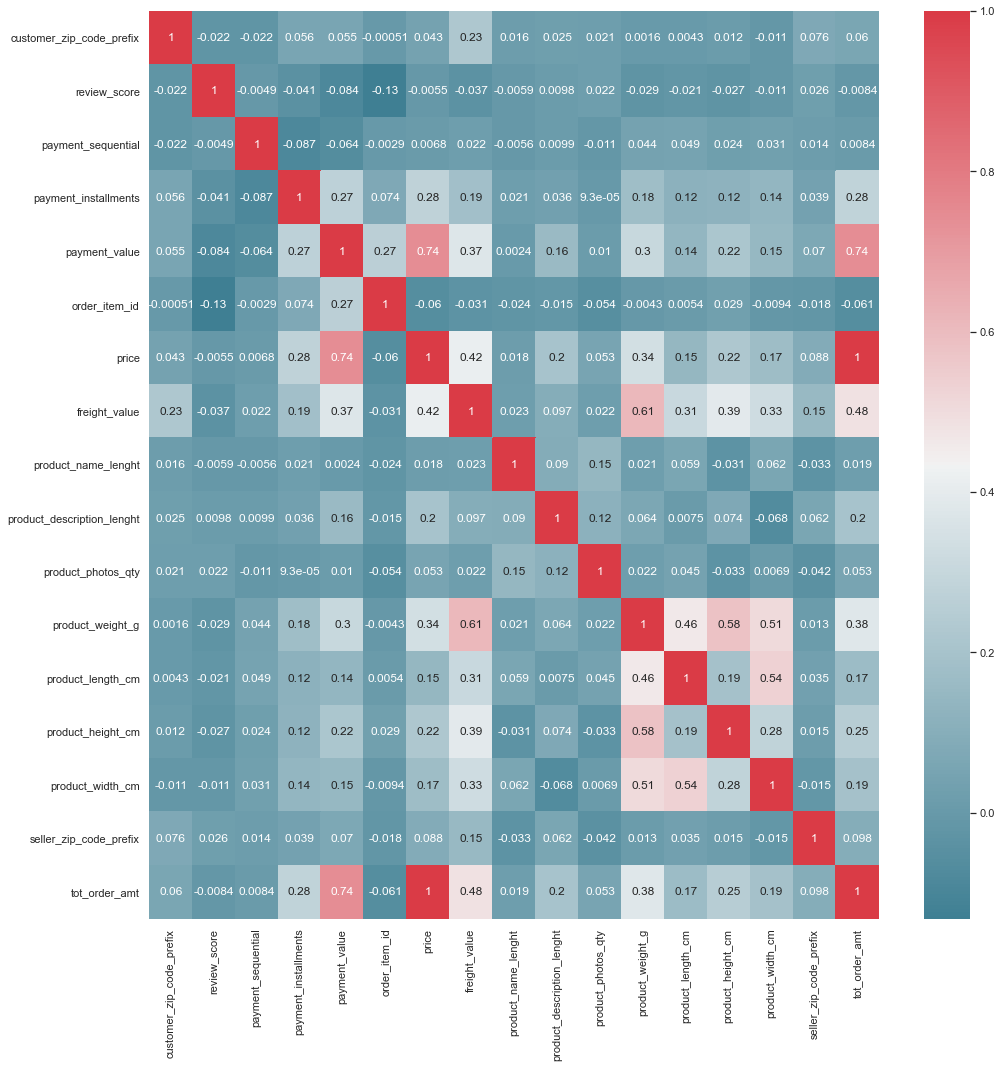

In [166]:
# let's try a heatmap
# plot the correlation matrix using seaborn 
# sns.corrplot() was depricated with v0.6!!!
sns.set(style="darkgrid") # one of the many styles to plot using

cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

f, ax = plt.subplots(figsize=(15,15))

sns.heatmap(olist.corr(), cmap=cmap, annot=True)

f.tight_layout()

Looks like price correlates with payment_value
Product_weight_g with freight_value
product_height with weight
product_width with weight
product_length with width
